# Basic Pipeline for Exploratory Data Analysis

# Business Problem

In this section, we are going to create a basic **pipeline** for **exploratory data analysis(EDA)** which can be applied on various datasets with **one main function**.

____

### Current Features
* Importing dataset and creating a DataFrame instance.
* Presenting general information about the dataset (e.g. head, shape, description).
* Separating the categorical and the numerical features of the dataset.
* Analyzing the categorical and the numerical features of the dataset.
* Visualizing the categorical and the numerical features of the dataset.
* Analyzing the target for the each feature.
* Analyzing the highly correlated features to improve the DataFrame.

____

### Possible Future Improvements

* Printing better reports to improve legibility.
* More accessibility for the user.
* ~Bypassing irrelevant features from the analysis (e.g. id, user_id).~ **COMPLETED**
* ~Categorizing numerical target for better target analysis.~ **COMPLETED**
* Encoding for the incompatible data types.
* Handling missing values in the dataset.

# Required Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Importing Dataset

In [2]:
def load_dataset(path):
    """
    Load a dataset from the specified file path.

    Parameters
    ----------
    path : str
        The path to the dataset file, including the file name and its extension.

    Returns
    -------
    df : DataFrame
        The loaded dataset as a pandas DataFrame.
    """
    df = pd.read_csv(path)
    return df

 # General Information About the Dataset

In [3]:
def check_df(dataframe, head=5, tail=5):
    """
    Display various descriptive statistics and information about a DataFrame.

    This function prints the head, tail, shape, data types, size, number of null values,
    and quartile statistics (including every ten percent) of the provided DataFrame.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the descriptive methods are applied.
        
    head : int, optional
        The number of rows to display from the top of the DataFrame (default is 5).
    
    tail : int, optional
        The number of rows to display from the bottom of the DataFrame (default is 5).
    
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    print('*'*20, 'HEAD', '*'*20)
    print(dataframe.head(head))
    print('*'*20, 'TAIL', '*'*20)
    print(dataframe.tail(tail))
    print('*'*20, 'SHAPE', '*'*20)
    print(dataframe.shape)
    print('*'*20, 'TYPES', '*'*20)
    print(dataframe.dtypes)
    print('*'*20, 'SIZE', '*'*20)
    print(dataframe.size)
    print('*'*20, 'NA', '*'*20)
    print(dataframe.isnull().sum())
    print('*'*20, 'QUARTILES', '*'*20)
    print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]).T)

In [4]:
def col_remover(dataframe, del_cols=["id", "id_", "_id"], keep_cols=[]):
    """
    Removes unwanted columns from the dataset permanently.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    del_cols : list, optional
        Column name prefixes or suffixes that are wanted to be removed from the dataset. 
        (default is ['id', 'id_', '_id'])
    
    keep_cols : list, optional
        Column name prefixes or suffixes that are wanted to be kept in the dataset. (default is []).
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    del_cols = tuple(del_cols)
    for col in dataframe.columns:
        if col in keep_cols:
            continue
        elif col.startswith(del_cols) or col.endswith(del_cols):
            dataframe.drop(col, axis=1, inplace=True)

# Analysis of Categorical and Numerical Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    """
    Separates numerical and categorical variables of a DataFrame via list comprehension
    and returns each of them with a relatable variable name.
    
    Also reports the result of the variables if the report parameter is assigned as True.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    cat_th : int, optional
        The threshold number for separating categorical variables which have numerical
        data type (default is 10).
    
    car_th : int, optional
        The threshold number for separating categorical variables which have high
        cardinality (default is 20).
        
    report : bool, optional
        Indicates the boolean value of the report. (default is False)
        If typed as True, followings will be printed respectively:
            shape of dataframe, quantity of categorical, numerical, high cardinality, numerical but
            categorical features.
            
    Returns
    -------
    cat_cols : List
        Categorical features of the provided DataFrame.
        
    num_cols : List
        Numerical features of the provided DataFrame.
        
    cat_but_car : List
        Categorical features with high cardinality of the provided DataFrame.
        
    num_but_cat : List
        Categorical features that are seen as numerical data type of the provided DataFrame.
    """
    # categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "bool", "category"]]
    num_but_cat = [col for col in dataframe.columns if (dataframe[col].nunique() < cat_th and str(dataframe[col].dtypes) in ["uint8", "int64", "float64"])]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # numerical
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uin8"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    if report:
        print(f"Observation: {dataframe.shape[0]}")
        print(f"Variables: {dataframe.shape[1]}")
        print(f"Categorical Features: {len(cat_cols)}")
        print(f"Numerical Features: {len(num_cols)}")
        print(f"High Cardinality Features: {len(cat_but_car)}")
        print(f"Numerical But Categorical Features: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [6]:
def cat_summary(dataframe, col_name, plot=False):
    """
    Prints the value counts and the ratio of the provided column of a DataFrame and 
    plots a bar graph of the referred column if plot parameter is assigned as True.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    col_name : str
        Column name of the provided DataFrame which is intended to observe.
        (Expects a categorical feature)
    
    plot : bool, optional
        Plots a bar graph of the provided column if typed as True (default is False).
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    print(20*"*", col_name, 20*"*")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                 "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [7]:
def cat_summary_df(dataframe):
    """
    Separates the columns via function called grab_col_names, prints the descriptive information 
    and plots bar graphs of the all categorical features of the provided DataFrame.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        if str(dataframe[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

In [8]:
def num_summary(dataframe, num_col, plot=False):
    """
    Prints a descriptive information about the provided column of a DataFrame and 
    plots a histogram of the referred column if plot parameter is assigned as True.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    num_col : str
        Column name of the provided DataFrame which is intended to observe.
        (Expects a numerical feature)
    
    plot : bool, optional
        Plots a histogram of the provided column if typed as True (default is False).
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    print(20*"*", num_col, 20*"*")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)
    
    if plot:
        sns.set()
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [9]:
def num_summary_df(dataframe):
    """
    Separates the columns via function called grab_col_names, prints the descriptive information 
    and plots histograms of the all numerical features of the provided DataFrame.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

In [10]:
def plot_num_summary(dataframe):
    """
    Separates the columns via function called grab_col_names and plots histograms in a subplot
    of the all numerical features of the provided DataFrame.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1
    plt.figure(figsize=(10*cols, 4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

# Target Analysis

In [11]:
def cat_target(dataframe, target, target_th=20):
    """
    Categorizes the target if its unique value count reaches a specific threshold.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    target : str
        Column name of the target of the provided DataFrame.
    
    target_th : int, optional
        Specifies the threshold value for the condition of the function.
        
    Returns
    -------
    None
        If condition is satisfied; this function modifies the DataFrame 
        and does not return any value.
    """
    if dataframe[target].nunique() > target_th:
        target_desc = dataframe[target].describe()
        dataframe["cat_" + target] = pd.cut(dataframe[target], [target_desc[3], target_desc[4], 
                                                 target_desc[5], target_desc[6], target_desc[7]])

In [12]:
def target_summary_with_num(dataframe, target, numerical_col):
    """
    Prints the mean value of the provided numerical feature which is group by the target.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    target : str
        Column name of the target of the provided DataFrame.
    
    numerical_col : str
        Expects a numerical feature name of the provided DataFrame to apply on the function.
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    print(20*"*", target, "===>", numerical_col, 20*"*")
    if ("cat_" + target) in dataframe.columns:
        print(pd.DataFrame({"Target Mean": dataframe.groupby("cat_" + target)[numerical_col].mean()}))
    else:
        print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [13]:
def target_summary_with_num_df(dataframe, target):
    """
    Applies target_summary_with_num function for the whole DataFrame.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    target : str
        Column name of the target of the provided DataFrame.
    
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        if col == target:
            continue
        else:
            target_summary_with_num(dataframe, target, col)

In [14]:
def target_summary_with_cat(dataframe, target, categorical_col):
    """
    Prints the mean value of the target which is group by a categorical feature.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    target : str
        Column name of the target of the provided DataFrame.
    
    categorical_col : str
        Expects a categorical feature name of the provided DataFrame to apply on the function.
        
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    print(20*"*", target, "===>", categorical_col, 20*"*")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))

In [15]:
def target_summary_with_cat_df(dataframe, target):
    """
    Applies target_summary_with_cat function for the whole DataFrame.
    
    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame on which the referred function is applied.
        
    target : str
        Column name of the target of the provided DataFrame.
    
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        if col == target:
            continue
        else:
            target_summary_with_cat(dataframe, target, col)

# Correlation Analysis

In [16]:
def high_correlated_cols(dataframe, corr_th=0.90, remove=False, plot=False):
    """
    Identify and optionally remove highly correlated columns in a DataFrame.

    This function finds pairs of columns with correlation coefficients above the specified threshold
    and can remove them or plot their correlation heatmap.

    Parameters
    ----------
    dataframe : DataFrame
        The DataFrame for which to analyze correlations.
    
    corr_th : float, optional
        The correlation threshold above which columns are considered highly correlated (default is 0.90).
    
    remove : bool, optional
        If True, remove the highly correlated columns from the DataFrame (default is False).
    
    plot : bool, optional
        If True, plot a heatmap of the correlations between numeric columns (default is False).

    Returns
    -------
    drop_list : List
        A list of column names that are highly correlated and potentially removed from the DataFrame.
    """
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
        print(20*"*", "After Correlation Analysis, You Don't Need to Remove Any Variables", 20*"*")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
    if plot:
        num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
        plt.figure(figsize=(int(dataframe.shape[1]), int(dataframe.shape[1])))
        sns.heatmap(dataframe[num_cols].corr(), cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

# Pipeline

In [17]:
def main(path_dataset, target, keep_cols=[], corr_th=0.90):
    """
    Applies an exploratory data analysis on a Dataset.

    This function benefits from the various functions and libraries to process.

    Parameters
    ----------
    path_dataset : str
        Current path for the dataset which is intended to be analyzed.
    
    target : str
        Column name of the target of the provided DataFrame.
    
    keep_cols : list, optional
        Column names which are wanted to be kept in the dataset. (columns that
        start or end with 'id' is going to be removed by default.)
    
    corr_th : float, optional
        The correlation threshold above which columns are considered highly correlated (default is 0.90).
    
    Returns
    -------
    None
        This function prints the output and does not return any value.
    """
    df = load_dataset(path_dataset)
    print(20*"*", "General Information About the Dataset", 20*"*")
    check_df(df)
    col_remover(df, del_cols=["id", "id_", "_id"], keep_cols=keep_cols)
    print(20*"*", "Analysis of Categorical and Numerical Variables", 20*"*")
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, report=True)
    cat_summary_df(df)
    num_summary_df(df)
    cat_target(df, target, target_th=20)
    if len(num_cols) > 1:
        print(20*"*", "Numerical Target Analysis", 20*"*")
        target_summary_with_num_df(df, target)
    if len(cat_cols) > 1:
        print(20*"*", "Categorical Target Analysis", 20*"*")
        target_summary_with_cat_df(df, target)
    print(20*"*", "Correlation Analysis", 20*"*")
    drop_list = high_correlated_cols(df, corr_th=corr_th, remove=True, plot=True)
    plot_num_summary(df)

# Examples on Datasets

Current examples of the pipeline for the following datasets respectively:
* [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data)
    
    **Description:** <br>
    Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
    
* [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)
    
    **Description:** <br>
    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
* [Hitters Dataset](https://www.kaggle.com/datasets/floser/hitters)
    
    **Description:** <br>
    This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

# Breast Cancer Dataset

******************** General Information About the Dataset ********************

******************** HEAD ********************

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \

0    842302         M       17.990        10.380         122.800   1001.000            0.118             0.278           0.300                0.147          0.242                   0.079      1.095       0.905         8.589  153.400          0.006           0.049         0.054              0.016        0.030                 0.006        25.380         17.330          184.600    2019

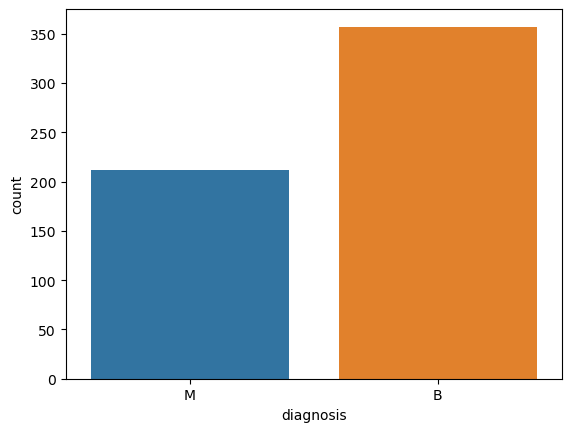

******************** radius_mean ********************

count   569.000

mean     14.127

std       3.524

min       6.981

1%        8.458

5%        9.529

10%      10.260

20%      11.366

30%      12.012

40%      12.726

50%      13.370

60%      14.058

70%      15.056

80%      17.068

90%      19.530

95%      20.576

99%      24.372

max      28.110

Name: radius_mean, dtype: float64


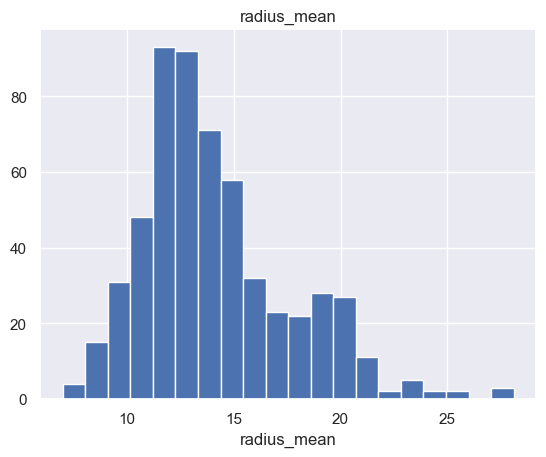

******************** texture_mean ********************

count   569.000

mean     19.290

std       4.301

min       9.710

1%       10.930

5%       13.088

10%      14.078

20%      15.656

30%      16.840

40%      17.912

50%      18.840

60%      19.968

70%      21.272

80%      22.440

90%      24.992

95%      27.150

99%      30.652

max      39.280

Name: texture_mean, dtype: float64


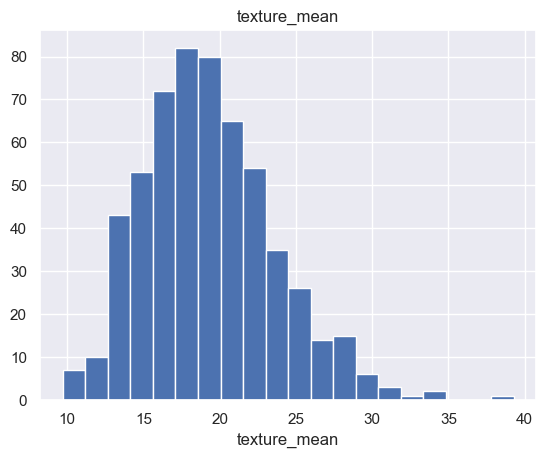

******************** perimeter_mean ********************

count   569.000

mean     91.969

std      24.299

min      43.790

1%       53.828

5%       60.496

10%      65.830

20%      73.292

30%      77.360

40%      81.938

50%      86.240

60%      91.420

70%      98.200

80%     111.680

90%     129.100

95%     135.820

99%     165.724

max     188.500

Name: perimeter_mean, dtype: float64


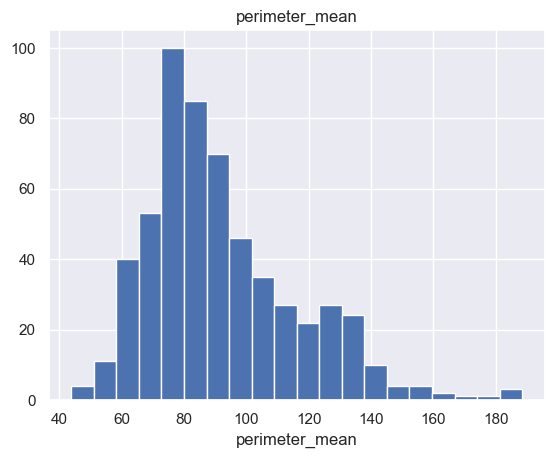

******************** area_mean ********************

count    569.000

mean     654.889

std      351.914

min      143.500

1%       215.664

5%       275.780

10%      321.600

20%      396.560

30%      444.060

40%      496.440

50%      551.100

60%      609.740

70%      700.660

80%      915.060

90%     1177.400

95%     1309.800

99%     1786.600

max     2501.000

Name: area_mean, dtype: float64


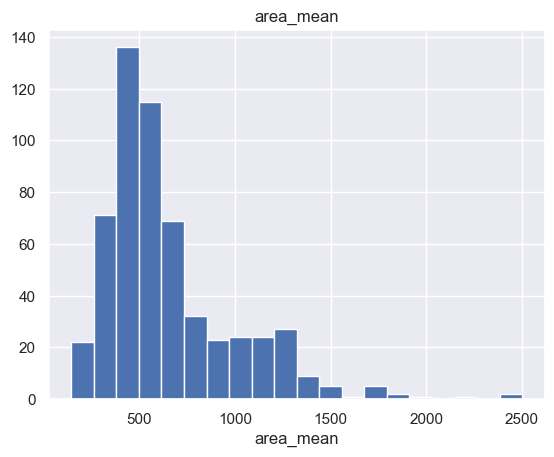

******************** smoothness_mean ********************

count   569.000

mean      0.096

std       0.014

min       0.053

1%        0.069

5%        0.075

10%       0.080

20%       0.084

30%       0.088

40%       0.092

50%       0.096

60%       0.099

70%       0.103

80%       0.107

90%       0.115

95%       0.119

99%       0.133

max       0.163

Name: smoothness_mean, dtype: float64


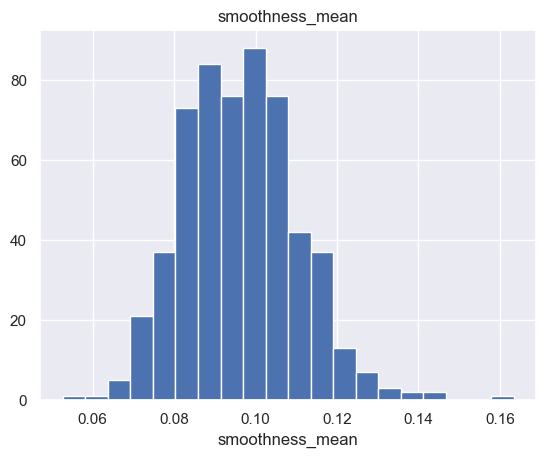

******************** compactness_mean ********************

count   569.000

mean      0.104

std       0.053

min       0.019

1%        0.033

5%        0.041

10%       0.050

20%       0.060

30%       0.070

40%       0.080

50%       0.093

60%       0.109

70%       0.122

80%       0.142

90%       0.175

95%       0.209

99%       0.277

max       0.345

Name: compactness_mean, dtype: float64


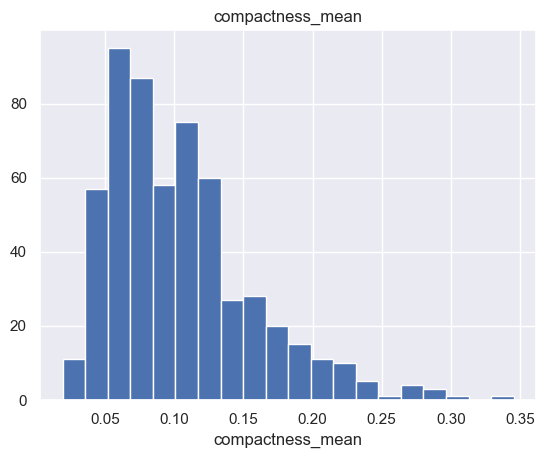

******************** concavity_mean ********************

count   569.000

mean      0.089

std       0.080

min       0.000

1%        0.000

5%        0.005

10%       0.014

20%       0.025

30%       0.034

40%       0.045

50%       0.062

60%       0.086

70%       0.112

80%       0.150

90%       0.203

95%       0.243

99%       0.352

max       0.427

Name: concavity_mean, dtype: float64


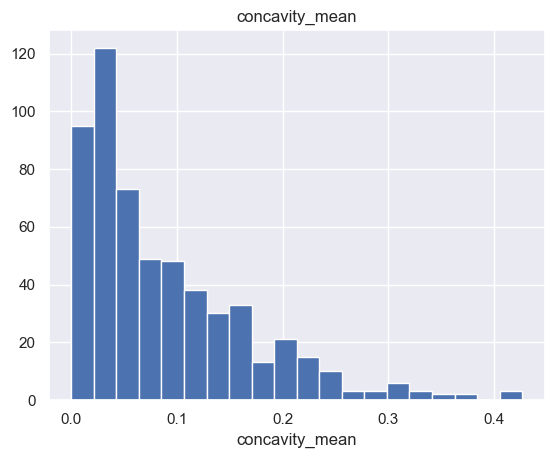

******************** concave points_mean ********************

count   569.000

mean      0.049

std       0.039

min       0.000

1%        0.000

5%        0.006

10%       0.011

20%       0.018

30%       0.023

40%       0.028

50%       0.034

60%       0.048

70%       0.064

80%       0.084

90%       0.100

95%       0.126

99%       0.164

max       0.201

Name: concave points_mean, dtype: float64


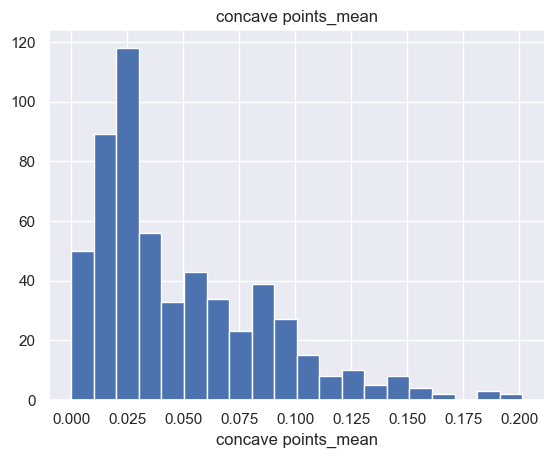

******************** symmetry_mean ********************

count   569.000

mean      0.181

std       0.027

min       0.106

1%        0.130

5%        0.142

10%       0.150

20%       0.159

30%       0.165

40%       0.172

50%       0.179

60%       0.185

70%       0.193

80%       0.201

90%       0.215

95%       0.231

99%       0.260

max       0.304

Name: symmetry_mean, dtype: float64


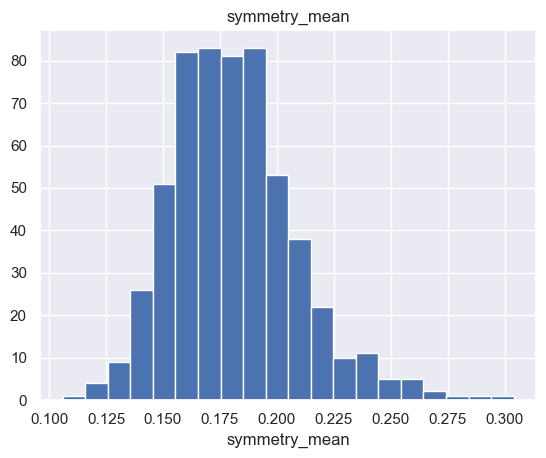

******************** fractal_dimension_mean ********************

count   569.000

mean      0.063

std       0.007

min       0.050

1%        0.052

5%        0.054

10%       0.055

20%       0.057

30%       0.059

40%       0.060

50%       0.062

60%       0.063

70%       0.065

80%       0.068

90%       0.072

95%       0.076

99%       0.085

max       0.097

Name: fractal_dimension_mean, dtype: float64


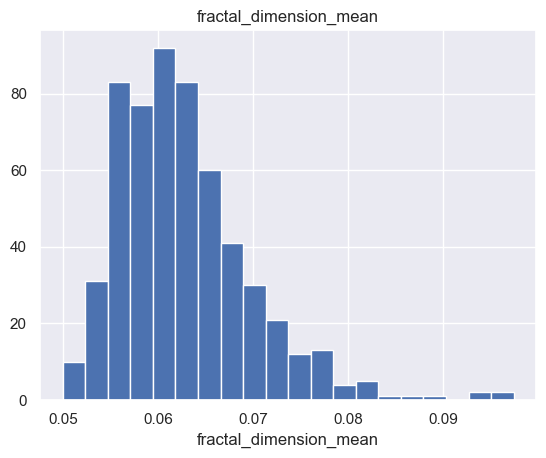

******************** radius_se ********************

count   569.000

mean      0.405

std       0.277

min       0.112

1%        0.120

5%        0.160

10%       0.183

20%       0.219

30%       0.246

40%       0.280

50%       0.324

60%       0.369

70%       0.431

80%       0.546

90%       0.749

95%       0.960

99%       1.291

max       2.873

Name: radius_se, dtype: float64


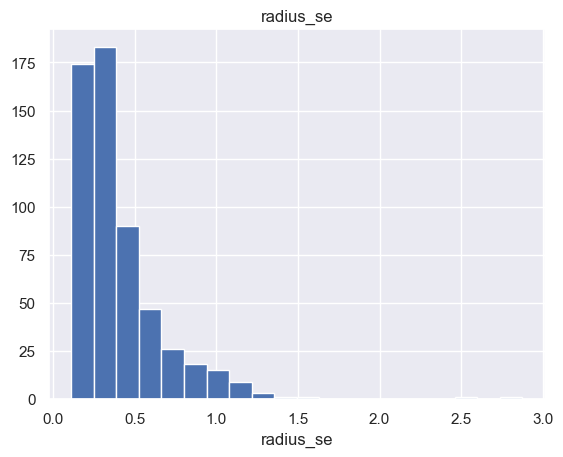

******************** texture_se ********************

count   569.000

mean      1.217

std       0.552

min       0.360

1%        0.411

5%        0.540

10%       0.640

20%       0.781

30%       0.902

40%       1.005

50%       1.108

60%       1.239

70%       1.388

80%       1.561

90%       1.909

95%       2.212

99%       2.915

max       4.885

Name: texture_se, dtype: float64


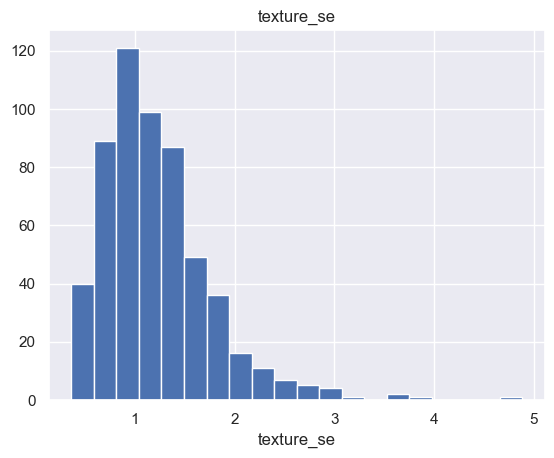

******************** perimeter_se ********************

count   569.000

mean      2.866

std       2.022

min       0.757

1%        0.953

5%        1.133

10%       1.280

20%       1.517

30%       1.741

40%       2.039

50%       2.287

60%       2.591

70%       3.050

80%       3.768

90%       5.123

95%       7.042

99%       9.690

max      21.980

Name: perimeter_se, dtype: float64


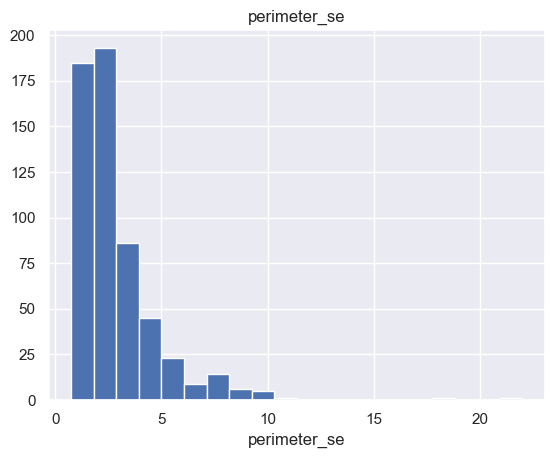

******************** area_se ********************

count   569.000

mean     40.337

std      45.491

min       6.802

1%        8.514

5%       11.360

10%      13.160

20%      16.640

30%      19.038

40%      21.078

50%      24.530

60%      29.322

70%      38.430

80%      54.088

90%      91.314

95%     115.800

99%     177.684

max     542.200

Name: area_se, dtype: float64


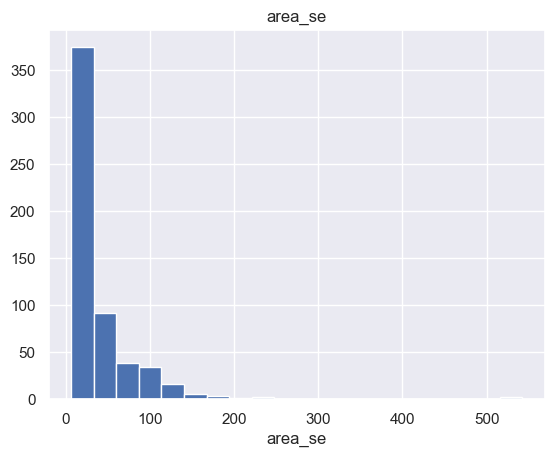

******************** smoothness_se ********************

count   569.000

mean      0.007

std       0.003

min       0.002

1%        0.003

5%        0.004

10%       0.004

20%       0.005

30%       0.005

40%       0.006

50%       0.006

60%       0.007

70%       0.008

80%       0.009

90%       0.010

95%       0.013

99%       0.017

max       0.031

Name: smoothness_se, dtype: float64


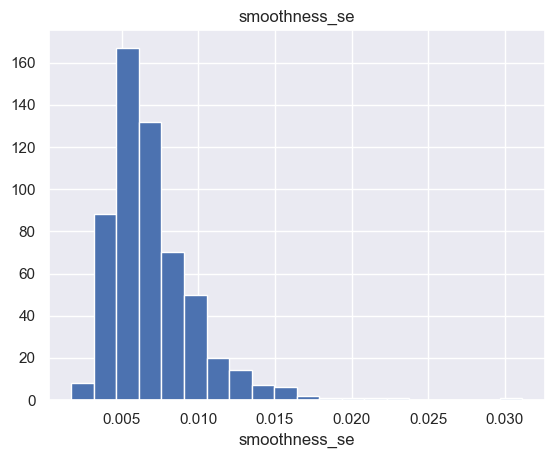

******************** compactness_se ********************

count   569.000

mean      0.025

std       0.018

min       0.002

1%        0.005

5%        0.008

10%       0.009

20%       0.012

30%       0.014

40%       0.017

50%       0.020

60%       0.024

70%       0.030

80%       0.036

90%       0.048

95%       0.061

99%       0.090

max       0.135

Name: compactness_se, dtype: float64


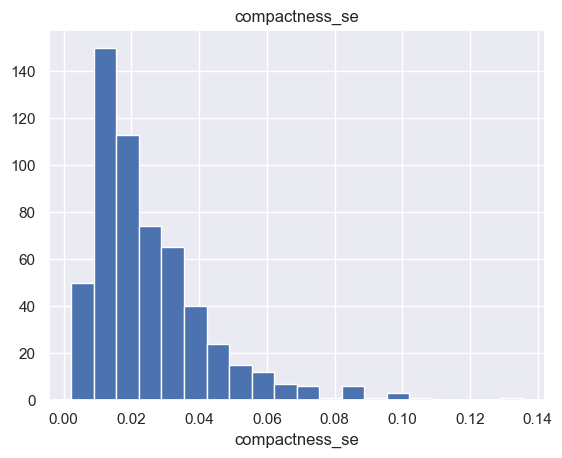

******************** concavity_se ********************

count   569.000

mean      0.032

std       0.030

min       0.000

1%        0.000

5%        0.003

10%       0.008

20%       0.013

30%       0.017

40%       0.020

50%       0.026

60%       0.031

70%       0.037

80%       0.046

90%       0.059

95%       0.079

99%       0.122

max       0.396

Name: concavity_se, dtype: float64


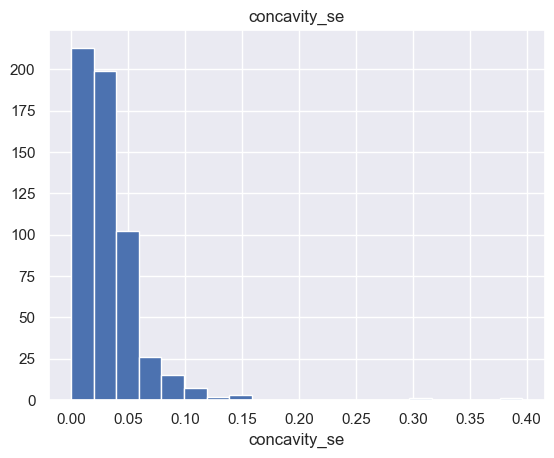

******************** concave points_se ********************

count   569.000

mean      0.012

std       0.006

min       0.000

1%        0.000

5%        0.004

10%       0.005

20%       0.007

30%       0.008

40%       0.010

50%       0.011

60%       0.012

70%       0.014

80%       0.016

90%       0.019

95%       0.023

99%       0.031

max       0.053

Name: concave points_se, dtype: float64


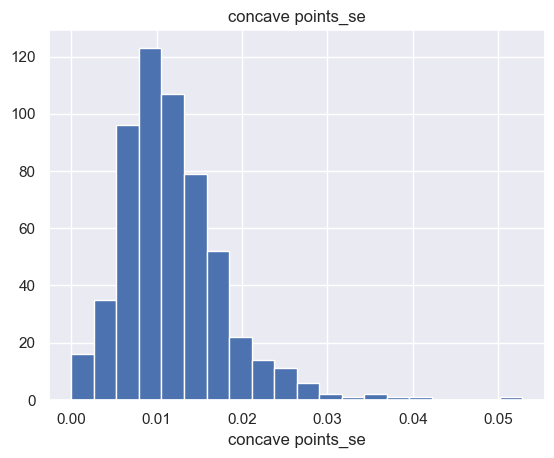

******************** symmetry_se ********************

count   569.000

mean      0.021

std       0.008

min       0.008

1%        0.011

5%        0.012

10%       0.013

20%       0.015

30%       0.016

40%       0.017

50%       0.019

60%       0.020

70%       0.022

80%       0.026

90%       0.030

95%       0.035

99%       0.052

max       0.079

Name: symmetry_se, dtype: float64


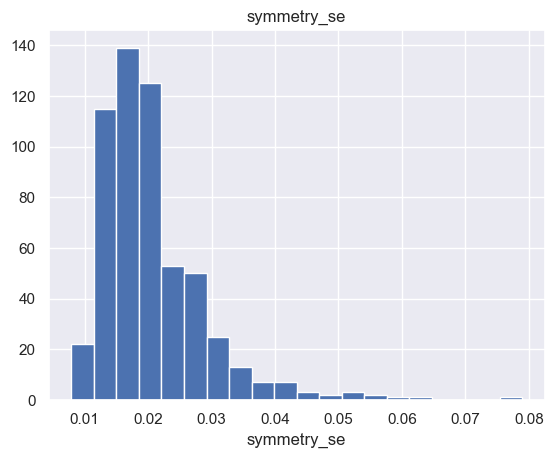

******************** fractal_dimension_se ********************

count   569.000

mean      0.004

std       0.003

min       0.001

1%        0.001

5%        0.002

10%       0.002

20%       0.002

30%       0.002

40%       0.003

50%       0.003

60%       0.004

70%       0.004

80%       0.005

90%       0.006

95%       0.008

99%       0.013

max       0.030

Name: fractal_dimension_se, dtype: float64


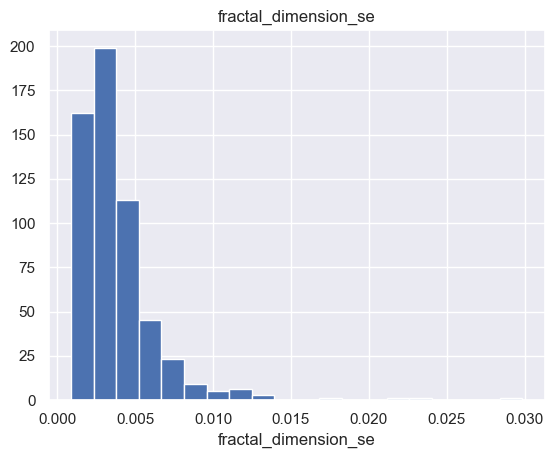

******************** radius_worst ********************

count   569.000

mean     16.269

std       4.833

min       7.930

1%        9.208

5%       10.534

10%      11.234

20%      12.498

30%      13.314

40%      14.008

50%      14.970

60%      16.004

70%      17.386

80%      20.294

90%      23.682

95%      25.640

99%      30.763

max      36.040

Name: radius_worst, dtype: float64


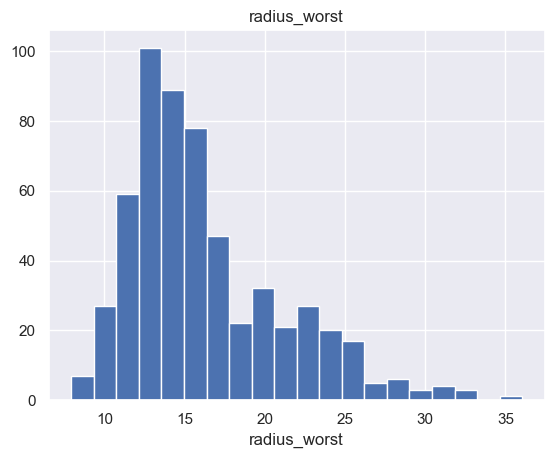

******************** texture_worst ********************

count   569.000

mean     25.677

std       6.146

min      12.020

1%       15.201

5%       16.574

10%      17.800

20%      20.176

30%      21.988

40%      23.584

50%      25.410

60%      26.724

70%      28.460

80%      30.908

90%      33.646

95%      36.300

99%      41.802

max      49.540

Name: texture_worst, dtype: float64


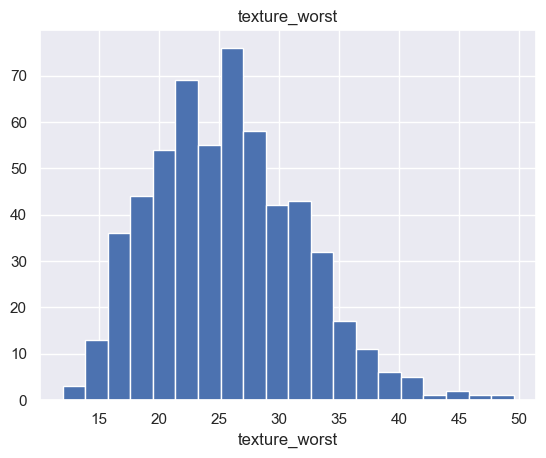

******************** perimeter_worst ********************

count   569.000

mean    107.261

std      33.603

min      50.410

1%       58.270

5%       67.856

10%      72.178

20%      81.402

30%      86.328

40%      91.304

50%      97.660

60%     105.740

70%     115.900

80%     133.500

90%     157.740

95%     171.640

99%     208.304

max     251.200

Name: perimeter_worst, dtype: float64


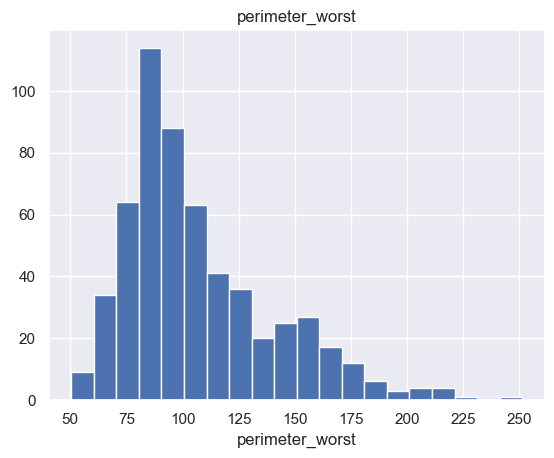

******************** area_worst ********************

count    569.000

mean     880.583

std      569.357

min      185.200

1%       256.192

5%       331.060

10%      384.720

20%      475.980

30%      544.140

40%      599.700

50%      686.500

60%      781.180

70%      926.960

80%     1269.000

90%     1673.000

95%     2009.600

99%     2918.160

max     4254.000

Name: area_worst, dtype: float64


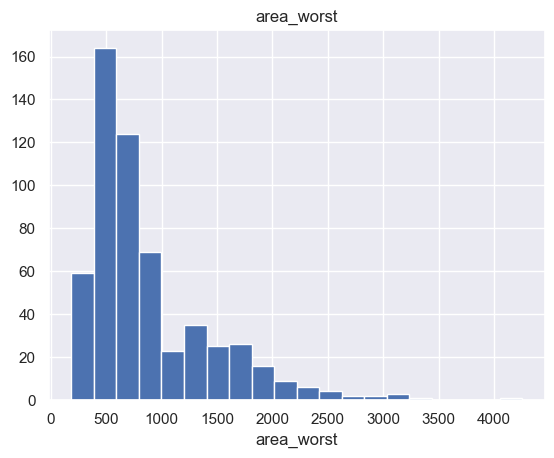

******************** smoothness_worst ********************

count   569.000

mean      0.132

std       0.023

min       0.071

1%        0.088

5%        0.096

10%       0.103

20%       0.113

30%       0.121

40%       0.126

50%       0.131

60%       0.138

70%       0.143

80%       0.150

90%       0.161

95%       0.172

99%       0.189

max       0.223

Name: smoothness_worst, dtype: float64


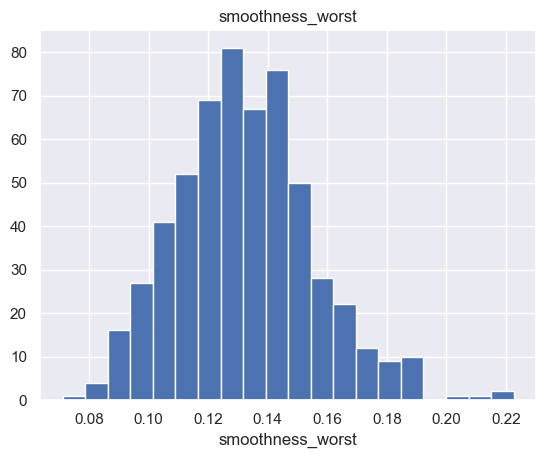

******************** compactness_worst ********************

count   569.000

mean      0.254

std       0.157

min       0.027

1%        0.050

5%        0.071

10%       0.094

20%       0.126

30%       0.161

40%       0.185

50%       0.212

60%       0.251

70%       0.304

80%       0.367

90%       0.448

95%       0.564

99%       0.779

max       1.058

Name: compactness_worst, dtype: float64


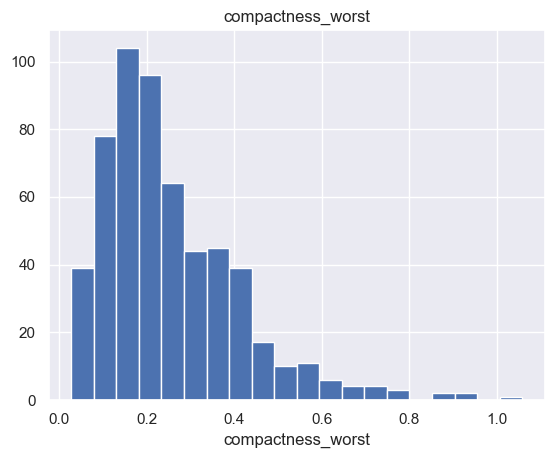

******************** concavity_worst ********************

count   569.000

mean      0.272

std       0.209

min       0.000

1%        0.000

5%        0.018

10%       0.046

20%       0.092

30%       0.137

40%       0.177

50%       0.227

60%       0.287

70%       0.350

80%       0.420

90%       0.571

95%       0.682

99%       0.902

max       1.252

Name: concavity_worst, dtype: float64


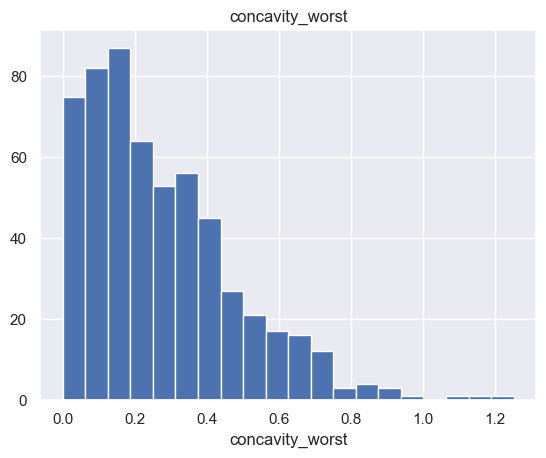

******************** concave points_worst ********************

count   569.000

mean      0.115

std       0.066

min       0.000

1%        0.000

5%        0.024

10%       0.038

20%       0.058

30%       0.072

40%       0.084

50%       0.100

60%       0.122

70%       0.151

80%       0.178

90%       0.209

95%       0.237

99%       0.269

max       0.291

Name: concave points_worst, dtype: float64


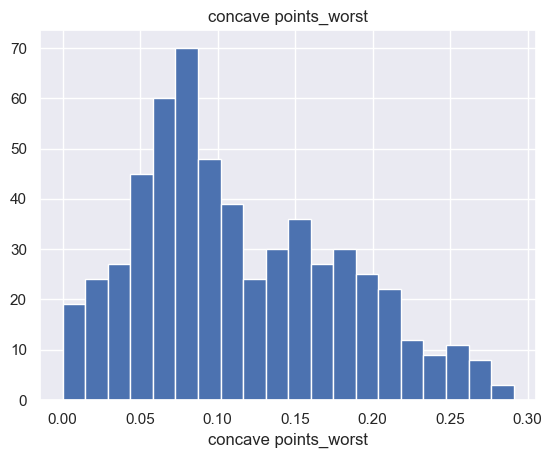

******************** symmetry_worst ********************

count   569.000

mean      0.290

std       0.062

min       0.157

1%        0.176

5%        0.213

10%       0.226

20%       0.244

30%       0.257

40%       0.269

50%       0.282

60%       0.296

70%       0.310

80%       0.325

90%       0.360

95%       0.406

99%       0.487

max       0.664

Name: symmetry_worst, dtype: float64


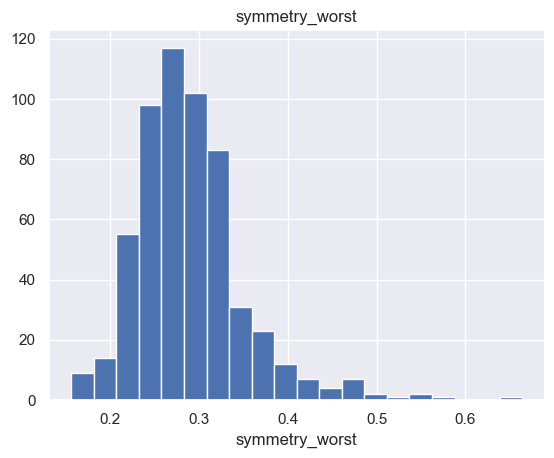

******************** fractal_dimension_worst ********************

count   569.000

mean      0.084

std       0.018

min       0.055

1%        0.059

5%        0.063

10%       0.066

20%       0.070

30%       0.073

40%       0.077

50%       0.080

60%       0.083

70%       0.089

80%       0.096

90%       0.106

95%       0.120

99%       0.141

max       0.207

Name: fractal_dimension_worst, dtype: float64


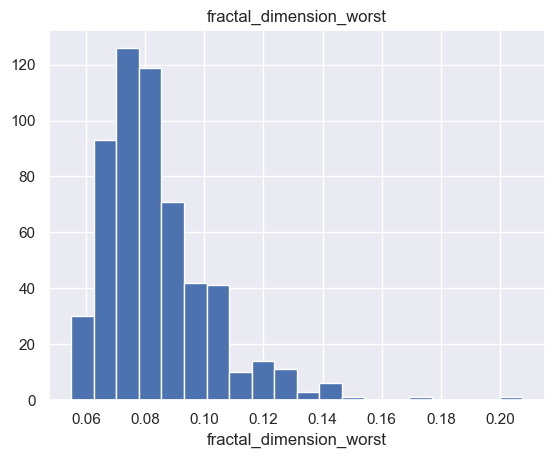

******************** Numerical Target Analysis ********************

******************** diagnosis ===> radius_mean ********************

           Target Mean

diagnosis             

B               12.147

M               17.463

******************** diagnosis ===> texture_mean ********************

           Target Mean

diagnosis             

B               17.915

M               21.605

******************** diagnosis ===> perimeter_mean ********************

           Target Mean

diagnosis             

B               78.075

M              115.365

******************** diagnosis ===> area_mean ********************

           Target Mean

diagnosis             

B              462.790

M              978.376

******************** diagnosis ===> smoothness_mean ********************

           Target Mean

diagnosis             

B                0.092

M                0.103

******************** diagnosis ===> compactness_mean ********************

           Target Me

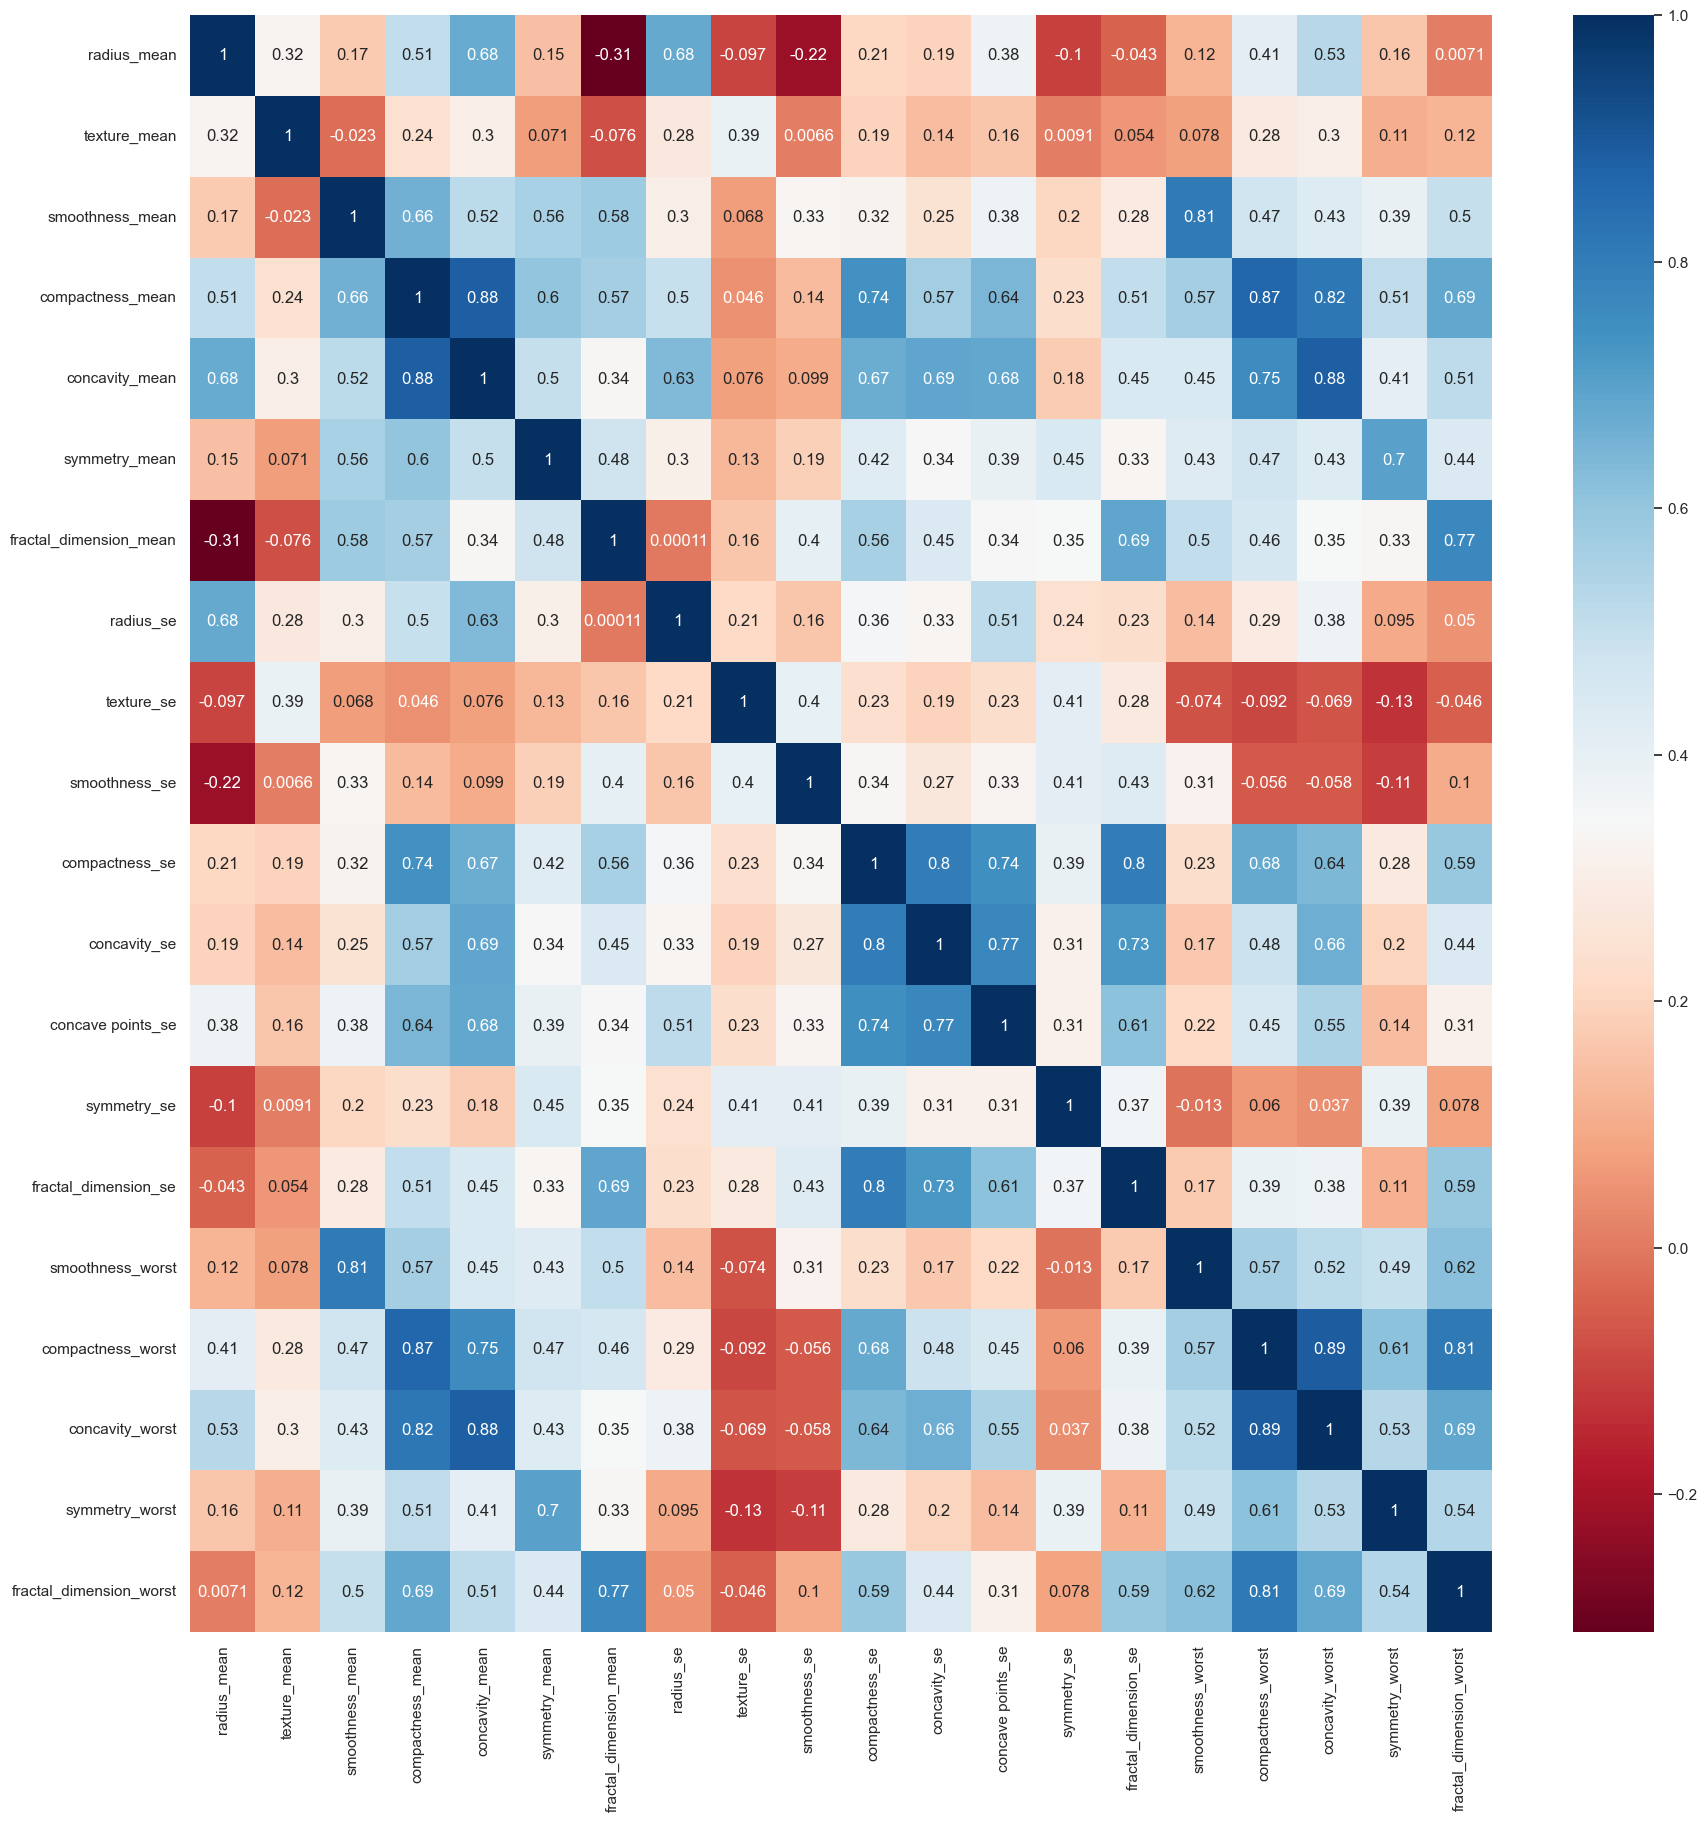

C:\Users\User\AppData\Local\Temp\ipykernel_1444\73733681.py:23: UserWarning: The figure layout has changed to tight

  plt.tight_layout()


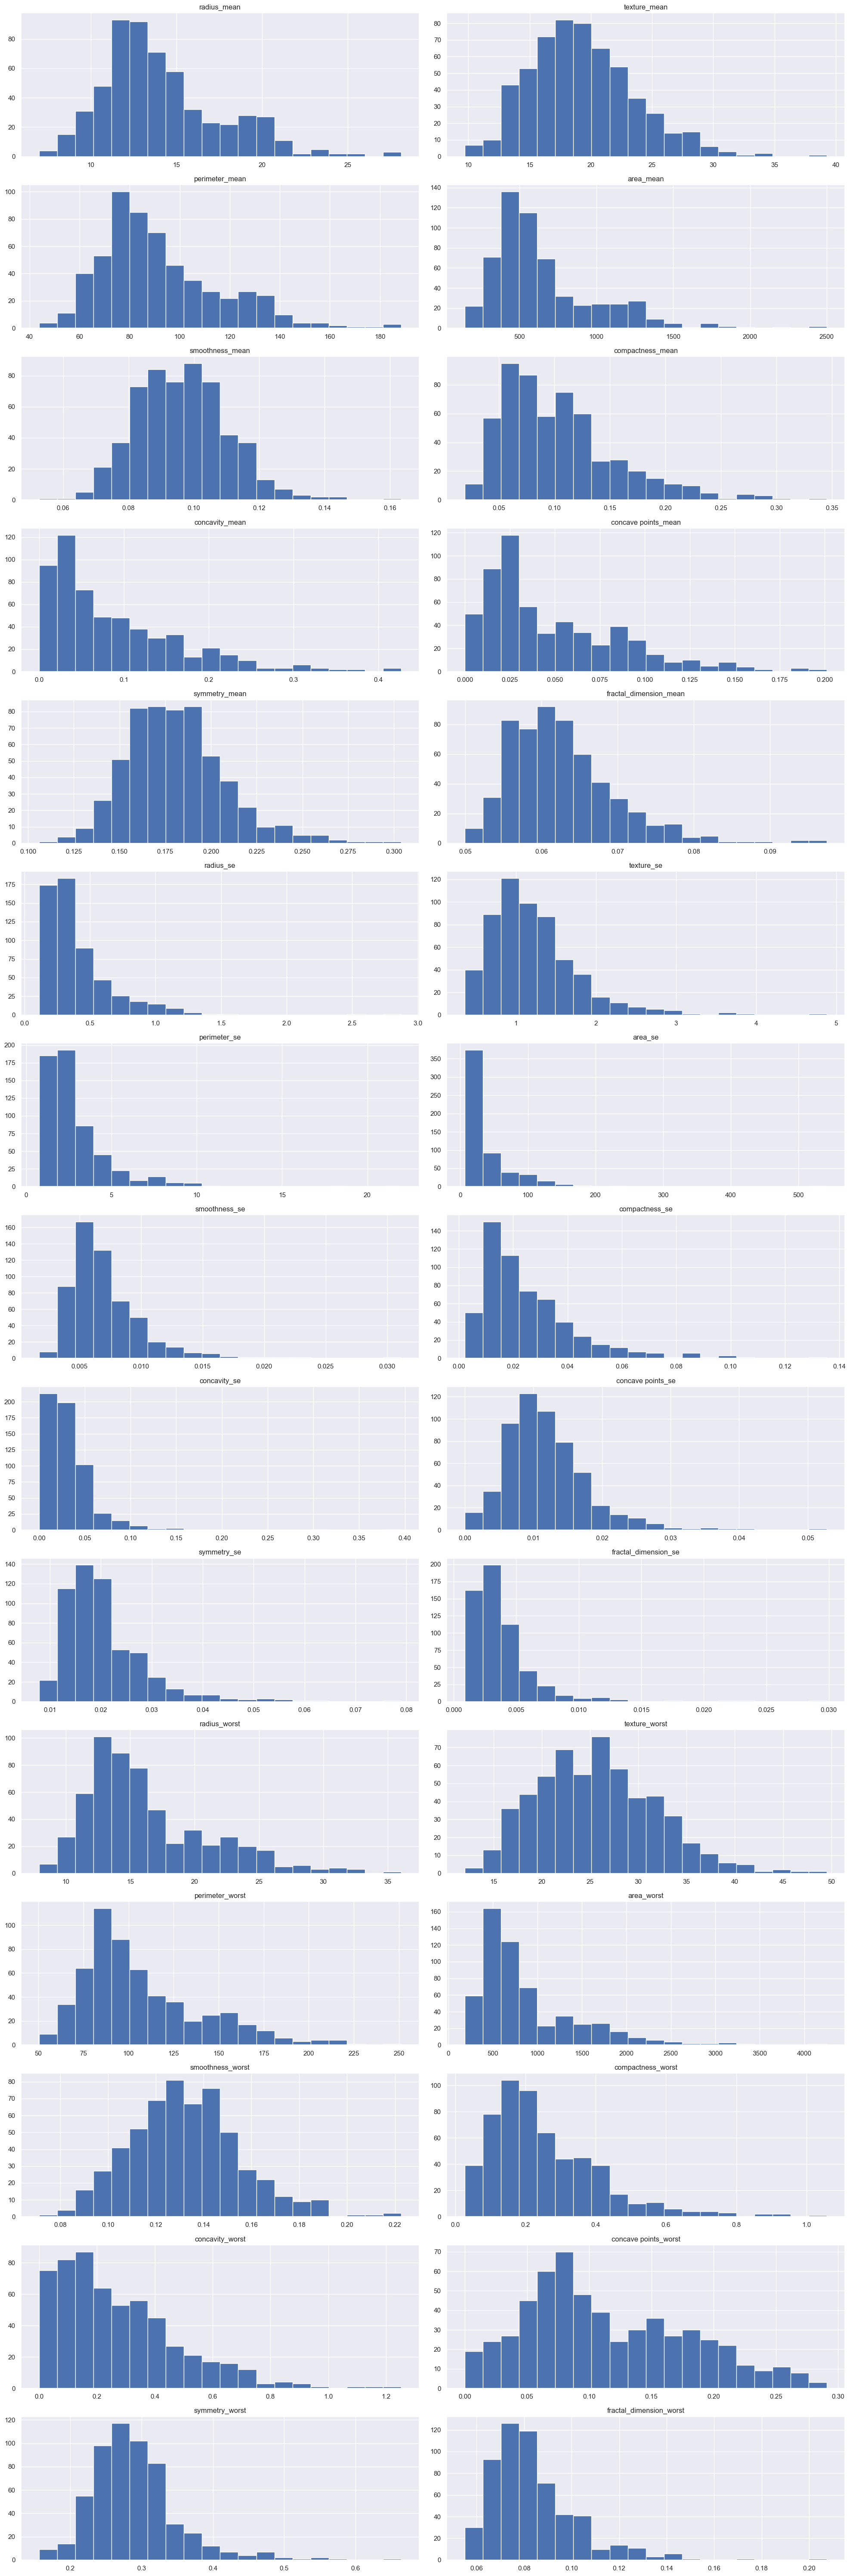

In [18]:
if __name__ == "__main__":
    main(path_dataset="/kaggle/input/breast-cancer-dataset/breast-cancer.csv", target="diagnosis")

# Diabetes Dataset

******************** General Information About the Dataset ********************

******************** HEAD ********************

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome

0            6      148             72             35        0 33.600                     0.627   50        1

1            1       85             66             29        0 26.600                     0.351   31        0

2            8      183             64              0        0 23.300                     0.672   32        1

3            1       89             66             23       94 28.100                     0.167   21        0

4            0      137             40             35      168 43.100                     2.288   33        1

******************** TAIL ********************

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome

763           10      101             76    

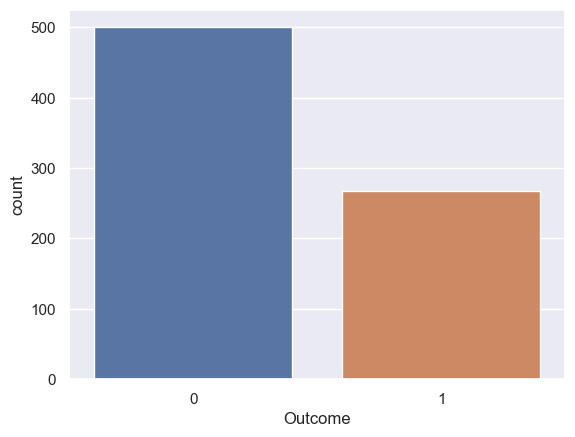

******************** Pregnancies ********************

count   768.000

mean      3.845

std       3.370

min       0.000

1%        0.000

5%        0.000

10%       0.000

20%       1.000

30%       1.000

40%       2.000

50%       3.000

60%       4.000

70%       5.000

80%       7.000

90%       9.000

95%      10.000

99%      13.000

max      17.000

Name: Pregnancies, dtype: float64


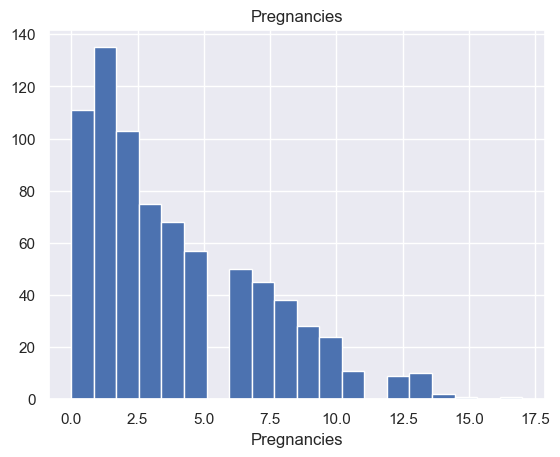

******************** Glucose ********************

count   768.000

mean    120.895

std      31.973

min       0.000

1%       57.000

5%       79.000

10%      85.000

20%      95.000

30%     102.000

40%     109.000

50%     117.000

60%     125.000

70%     134.000

80%     147.000

90%     167.000

95%     181.000

99%     196.000

max     199.000

Name: Glucose, dtype: float64


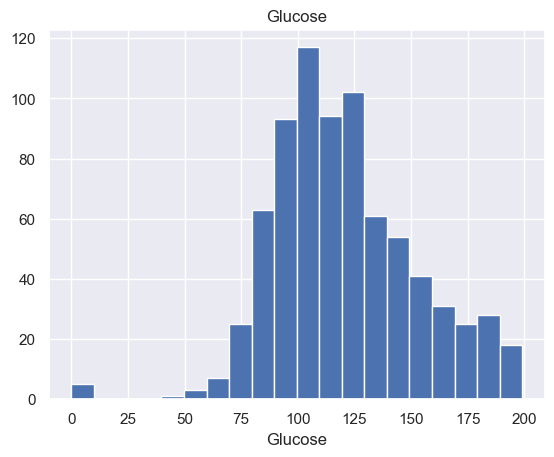

******************** BloodPressure ********************

count   768.000

mean     69.105

std      19.356

min       0.000

1%        0.000

5%       38.700

10%      54.000

20%      60.000

30%      64.000

40%      68.000

50%      72.000

60%      74.000

70%      78.000

80%      82.000

90%      88.000

95%      90.000

99%     106.000

max     122.000

Name: BloodPressure, dtype: float64


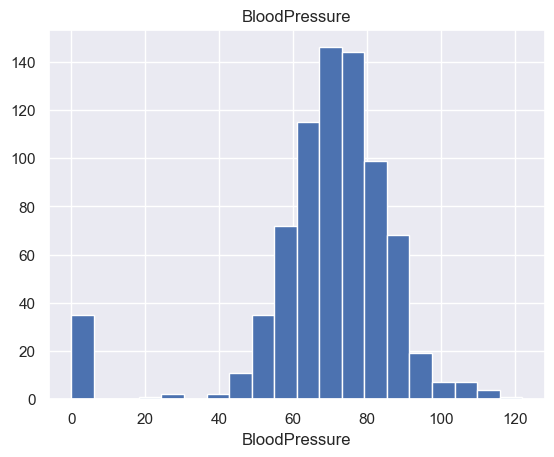

******************** SkinThickness ********************

count   768.000

mean     20.536

std      15.952

min       0.000

1%        0.000

5%        0.000

10%       0.000

20%       0.000

30%       8.200

40%      18.000

50%      23.000

60%      27.000

70%      31.000

80%      35.000

90%      40.000

95%      44.000

99%      51.330

max      99.000

Name: SkinThickness, dtype: float64


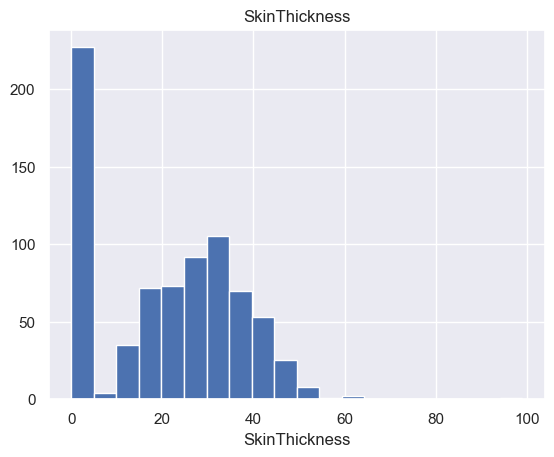

******************** Insulin ********************

count   768.000

mean     79.799

std     115.244

min       0.000

1%        0.000

5%        0.000

10%       0.000

20%       0.000

30%       0.000

40%       0.000

50%      30.500

60%      72.200

70%     106.000

80%     150.000

90%     210.000

95%     293.000

99%     519.900

max     846.000

Name: Insulin, dtype: float64


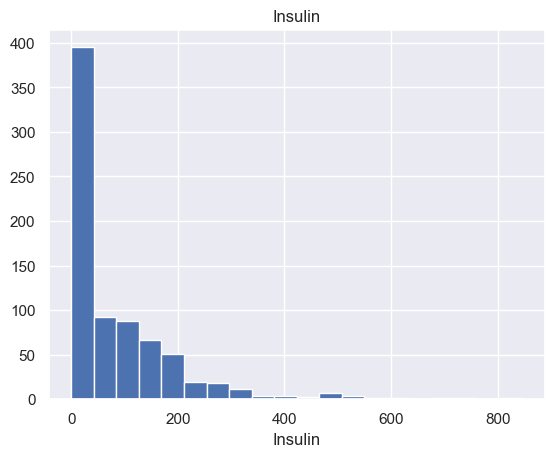

******************** BMI ********************

count   768.000

mean     31.993

std       7.884

min       0.000

1%        0.000

5%       21.800

10%      23.600

20%      25.900

30%      28.200

40%      30.100

50%      32.000

60%      33.700

70%      35.490

80%      37.800

90%      41.500

95%      44.395

99%      50.759

max      67.100

Name: BMI, dtype: float64


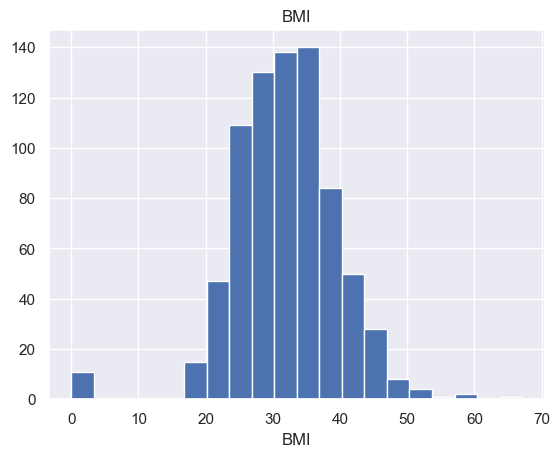

******************** DiabetesPedigreeFunction ********************

count   768.000

mean      0.472

std       0.331

min       0.078

1%        0.095

5%        0.140

10%       0.165

20%       0.219

30%       0.259

40%       0.303

50%       0.372

60%       0.454

70%       0.564

80%       0.687

90%       0.879

95%       1.133

99%       1.698

max       2.420

Name: DiabetesPedigreeFunction, dtype: float64


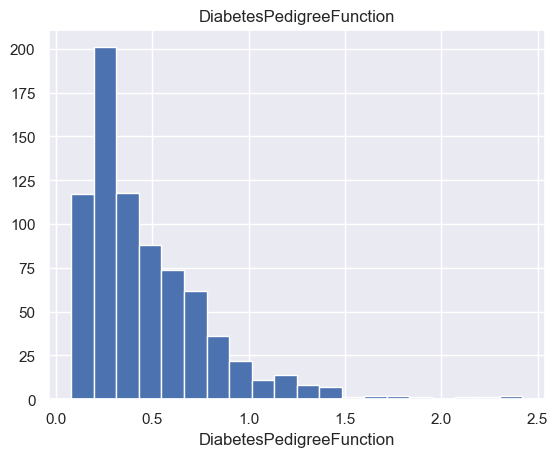

******************** Age ********************

count   768.000

mean     33.241

std      11.760

min      21.000

1%       21.000

5%       21.000

10%      22.000

20%      23.000

30%      25.000

40%      27.000

50%      29.000

60%      33.000

70%      38.000

80%      42.600

90%      51.000

95%      58.000

99%      67.000

max      81.000

Name: Age, dtype: float64


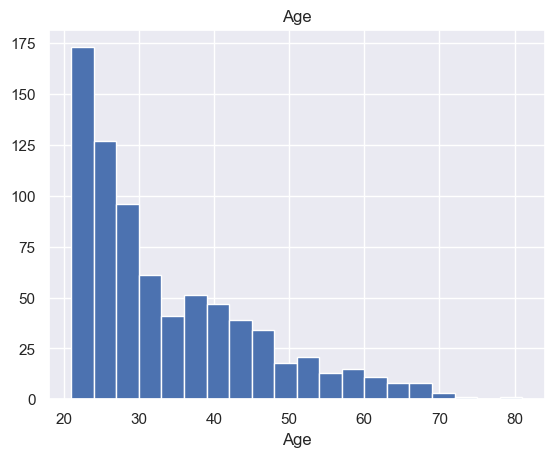

******************** Numerical Target Analysis ********************

******************** Outcome ===> Pregnancies ********************

         Target Mean

Outcome             

0              3.298

1              4.866

******************** Outcome ===> Glucose ********************

         Target Mean

Outcome             

0            109.980

1            141.257

******************** Outcome ===> BloodPressure ********************

         Target Mean

Outcome             

0             68.184

1             70.825

******************** Outcome ===> SkinThickness ********************

         Target Mean

Outcome             

0             19.664

1             22.164

******************** Outcome ===> Insulin ********************

         Target Mean

Outcome             

0             68.792

1            100.336

******************** Outcome ===> BMI ********************

         Target Mean

Outcome             

0             30.304

1             35.143

*******

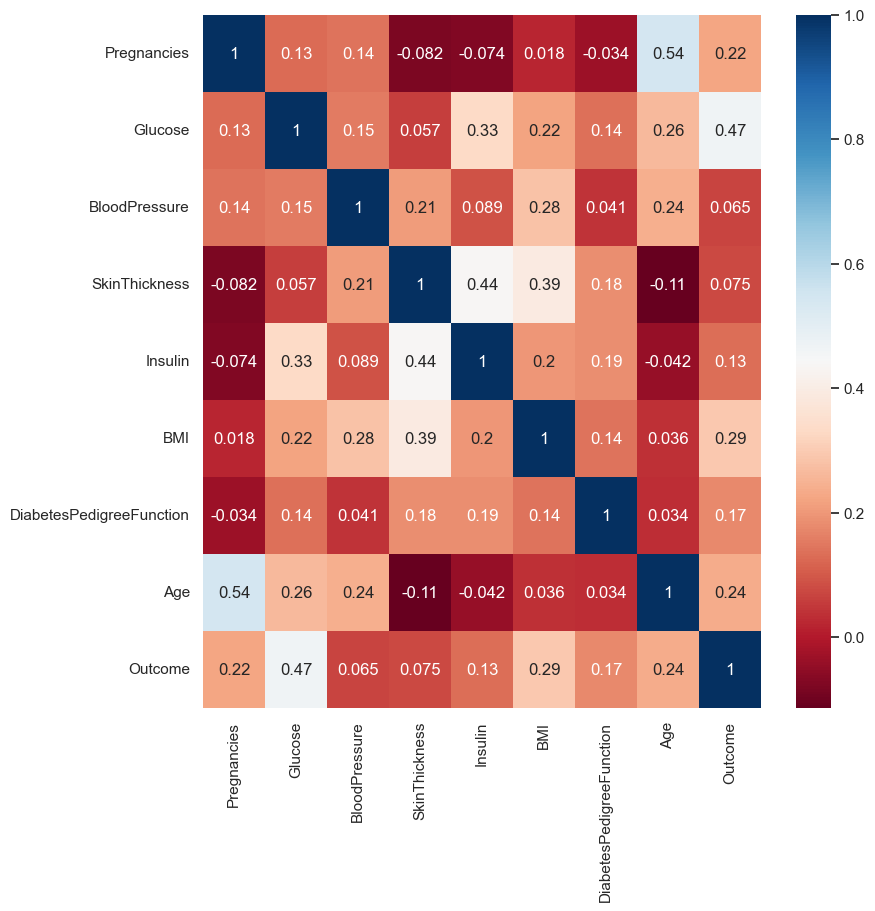

C:\Users\User\AppData\Local\Temp\ipykernel_1444\73733681.py:23: UserWarning: The figure layout has changed to tight

  plt.tight_layout()


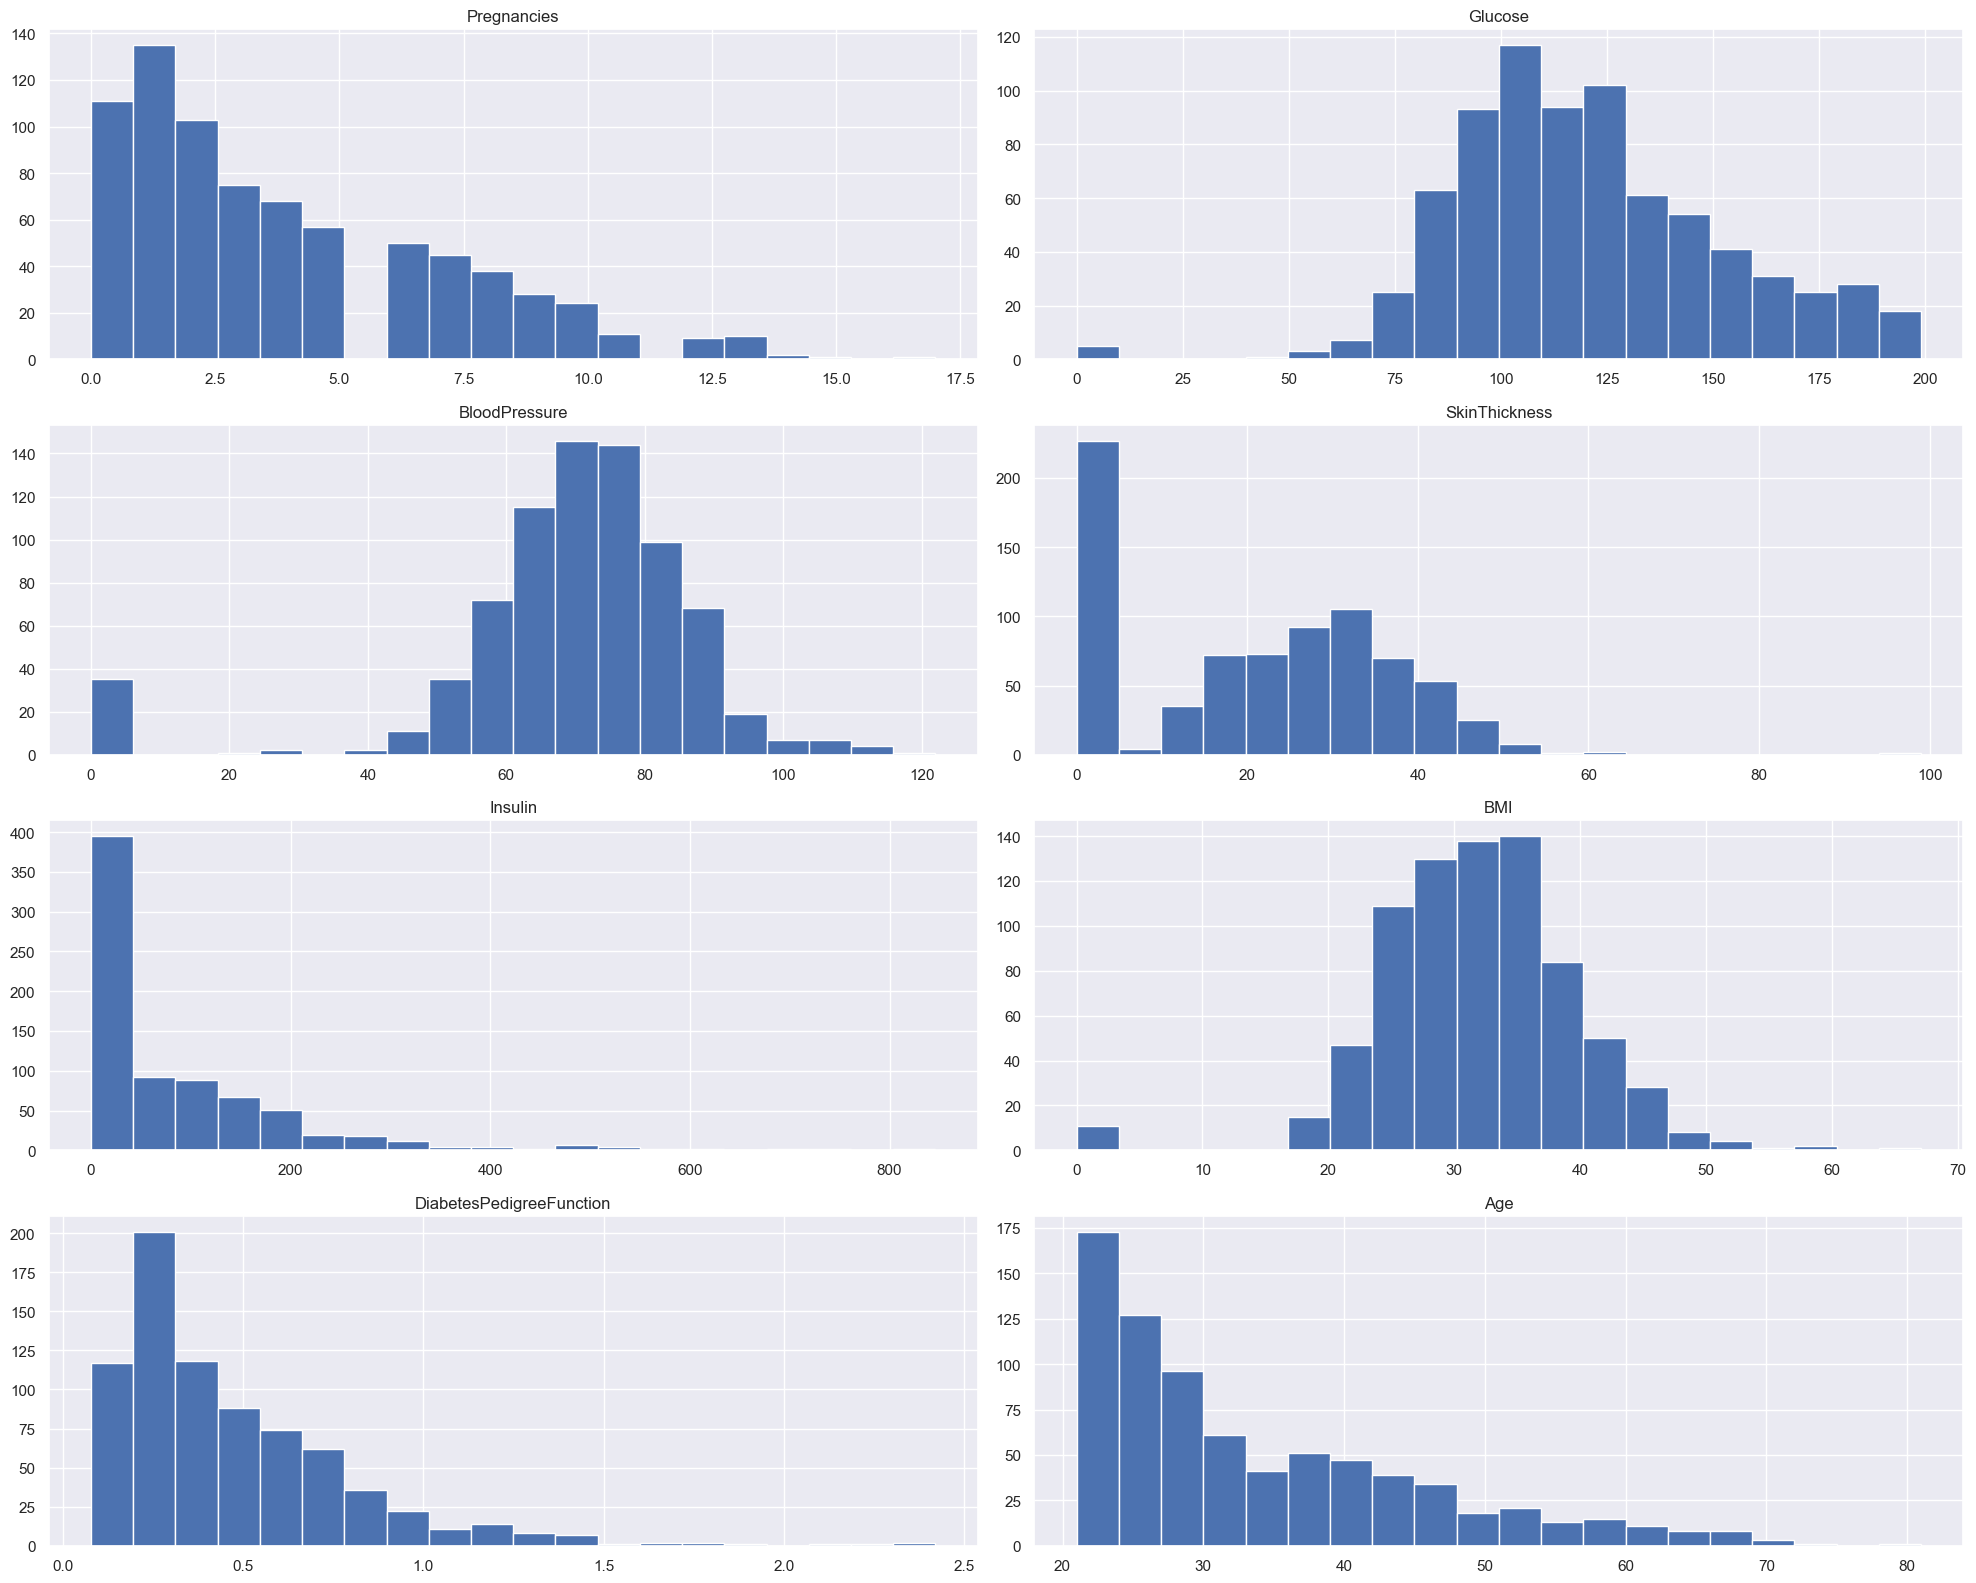

In [19]:
if __name__ == "__main__":
    main(path_dataset="/kaggle/input/diabetes-dataset/diabetes.csv", target="Outcome")

# Hitters Dataset

******************** General Information About the Dataset ********************

******************** HEAD ********************

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague

0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A

1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.000         N

2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.000         A

3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.000         N

4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E     

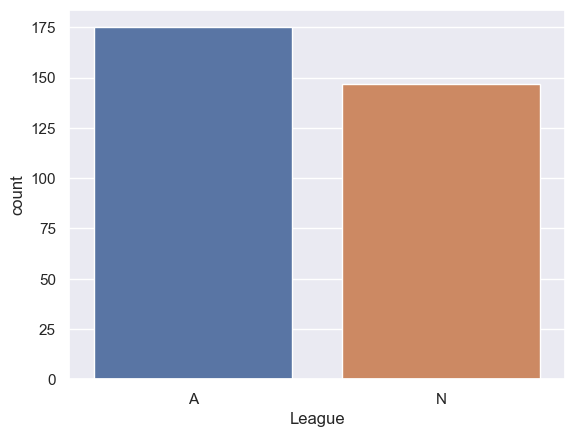

******************** Division ********************

   Division  Ratio

W       165 51.242

E       157 48.758


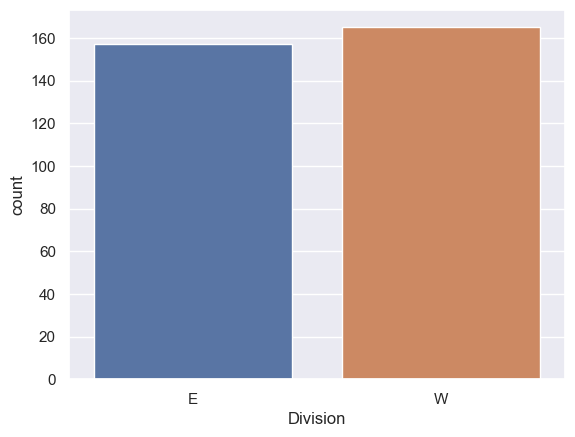

******************** NewLeague ********************

   NewLeague  Ratio

A        176 54.658

N        146 45.342


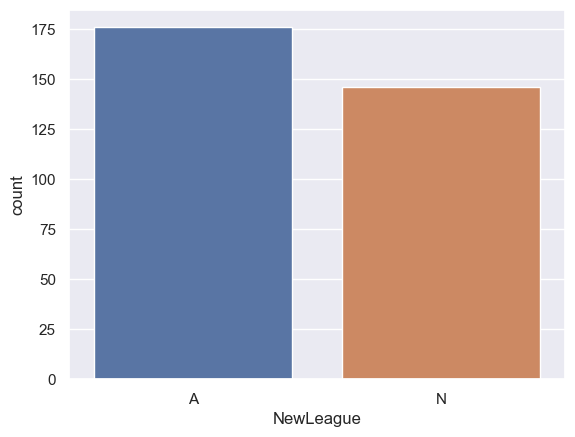

******************** AtBat ********************

count   322.000

mean    380.929

std     153.405

min      16.000

1%       20.420

5%      161.000

10%     194.100

20%     221.800

30%     281.300

40%     321.800

50%     379.500

60%     430.200

70%     490.000

80%     535.600

90%     584.900

95%     609.900

99%     658.590

max     687.000

Name: AtBat, dtype: float64


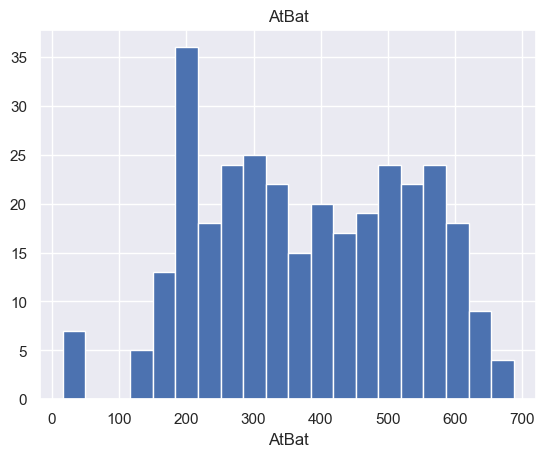

******************** Hits ********************

count   322.000

mean    101.025

std      46.455

min       1.000

1%        4.420

5%       39.000

10%      45.100

20%      57.000

30%      70.000

40%      82.000

50%      96.000

60%     113.000

70%     128.700

80%     144.000

90%     163.000

95%     174.000

99%     210.790

max     238.000

Name: Hits, dtype: float64


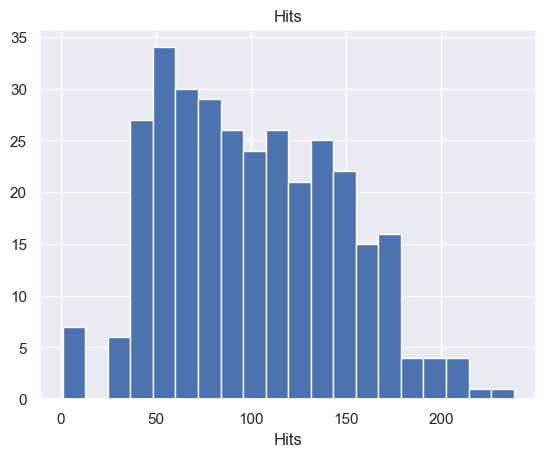

******************** HmRun ********************

count   322.000

mean     10.770

std       8.709

min       0.000

1%        0.000

5%        0.000

10%       1.000

20%       3.000

30%       5.000

40%       6.000

50%       8.000

60%      10.600

70%      14.000

80%      18.000

90%      24.000

95%      28.950

99%      33.000

max      40.000

Name: HmRun, dtype: float64


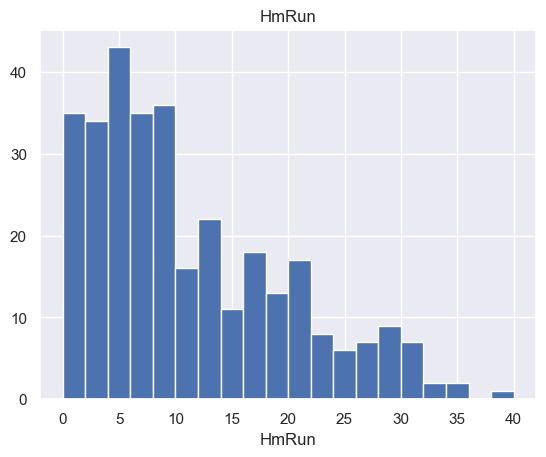

******************** Runs ********************

count   322.000

mean     50.910

std      26.024

min       0.000

1%        1.210

5%       17.000

10%      20.100

20%      27.000

30%      33.000

40%      41.000

50%      48.000

60%      55.600

70%      66.000

80%      75.800

90%      89.000

95%      94.000

99%     107.790

max     130.000

Name: Runs, dtype: float64


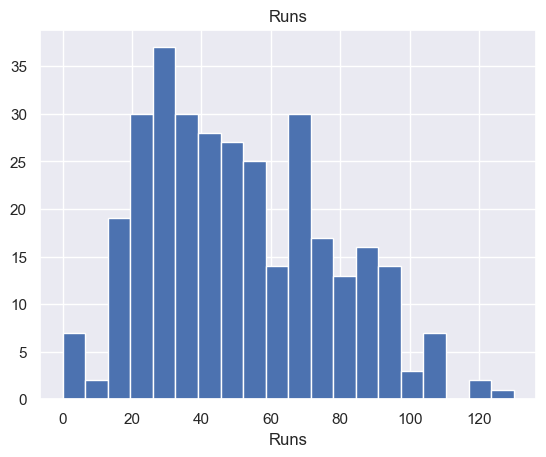

******************** RBI ********************

count   322.000

mean     48.028

std      26.167

min       0.000

1%        2.000

5%       14.000

10%      19.000

20%      26.000

30%      30.000

40%      36.400

50%      44.000

60%      49.000

70%      58.000

80%      73.000

90%      86.000

95%      96.000

99%     112.370

max     121.000

Name: RBI, dtype: float64


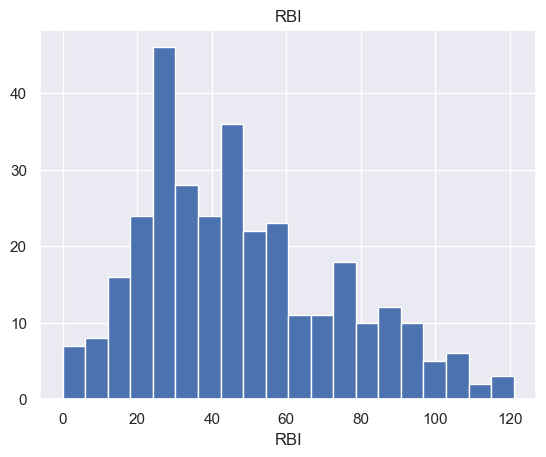

******************** Walks ********************

count   322.000

mean     38.742

std      21.639

min       0.000

1%        1.000

5%       11.050

10%      15.000

20%      20.000

30%      24.000

40%      30.000

50%      35.000

60%      40.000

70%      48.700

80%      59.000

90%      69.900

95%      78.000

99%      93.580

max     105.000

Name: Walks, dtype: float64


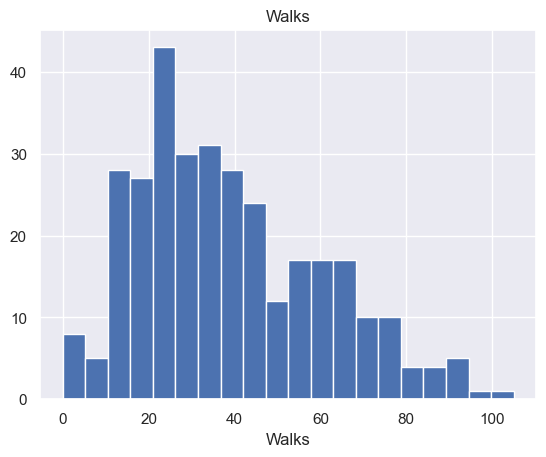

******************** Years ********************

count   322.000

mean      7.444

std       4.926

min       1.000

1%        1.000

5%        1.000

10%       2.000

20%       3.000

30%       4.000

40%       5.000

50%       6.000

60%       7.600

70%      10.000

80%      12.000

90%      15.000

95%      17.000

99%      19.790

max      24.000

Name: Years, dtype: float64


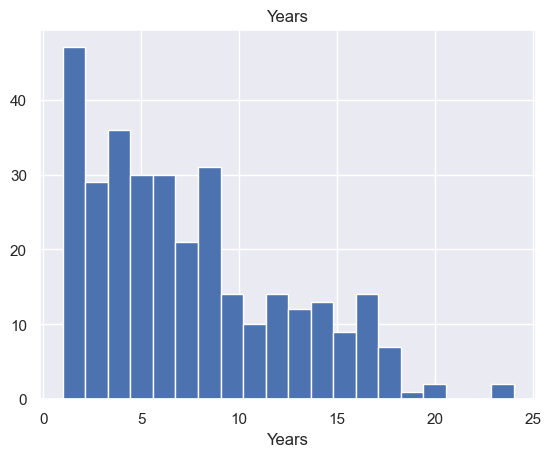

******************** CAtBat ********************

count     322.000

mean     2648.683

std      2324.206

min        19.000

1%         41.000

5%        216.500

10%       342.200

20%       667.600

30%       963.400

40%      1402.200

50%      1928.000

60%      2654.000

70%      3365.000

80%      4483.000

90%      6123.400

95%      7125.600

99%      8749.970

max     14053.000

Name: CAtBat, dtype: float64


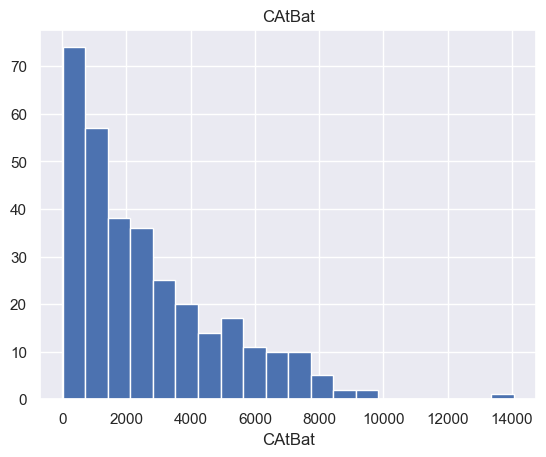

******************** CHits ********************

count    322.000

mean     717.571

std      654.473

min        4.000

1%         9.840

5%        54.000

10%       86.000

20%      164.600

30%      238.000

40%      355.800

50%      508.000

60%      708.200

70%      911.100

80%     1229.200

90%     1659.600

95%     2017.150

99%     2500.340

max     4256.000

Name: CHits, dtype: float64


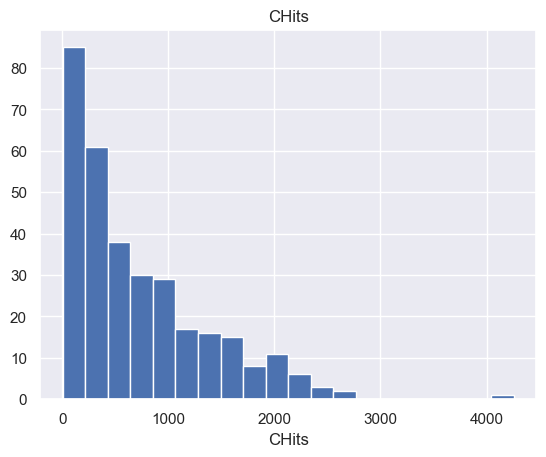

******************** CHmRun ********************

count   322.000

mean     69.491

std      86.266

min       0.000

1%        0.000

5%        2.000

10%       4.000

20%      10.200

30%      16.300

40%      27.400

50%      37.500

60%      51.200

70%      72.400

80%     103.800

90%     194.900

95%     265.650

99%     373.120

max     548.000

Name: CHmRun, dtype: float64


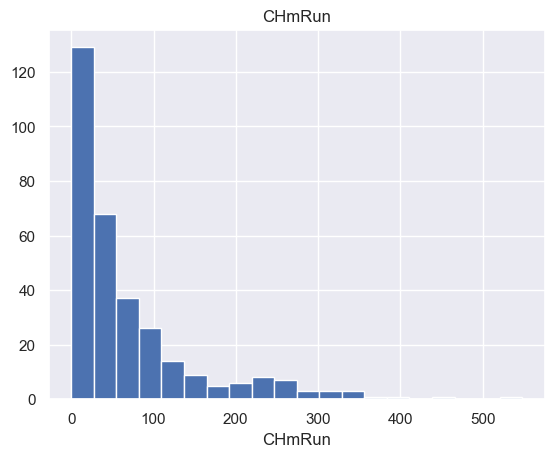

******************** CRuns ********************

count    322.000

mean     358.795

std      334.106

min        1.000

1%         3.630

5%        27.000

10%       38.100

20%       80.400

30%      117.300

40%      181.000

50%      247.000

60%      333.000

70%      443.400

80%      627.200

90%      895.700

95%     1032.300

99%     1174.370

max     2165.000

Name: CRuns, dtype: float64


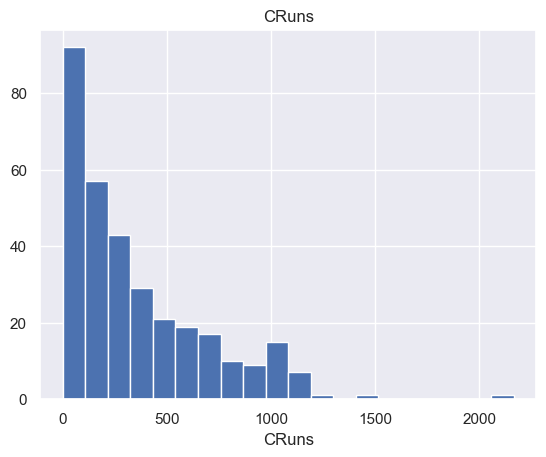

******************** CRBI ********************

count    322.000

mean     330.118

std      333.220

min        0.000

1%         4.630

5%        22.050

10%       34.100

20%       70.200

30%      106.300

40%      149.000

50%      220.500

60%      303.600

70%      379.100

80%      496.200

90%      861.600

95%     1071.750

99%     1310.850

max     1659.000

Name: CRBI, dtype: float64


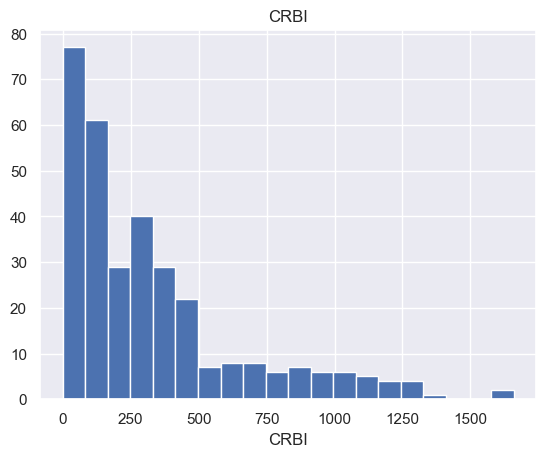

******************** CWalks ********************

count    322.000

mean     260.239

std      267.058

min        0.000

1%         4.000

5%        15.050

10%       30.100

20%       55.000

30%       82.000

40%      117.400

50%      170.500

60%      226.600

70%      300.700

80%      421.000

90%      643.900

95%      817.600

99%     1139.140

max     1566.000

Name: CWalks, dtype: float64


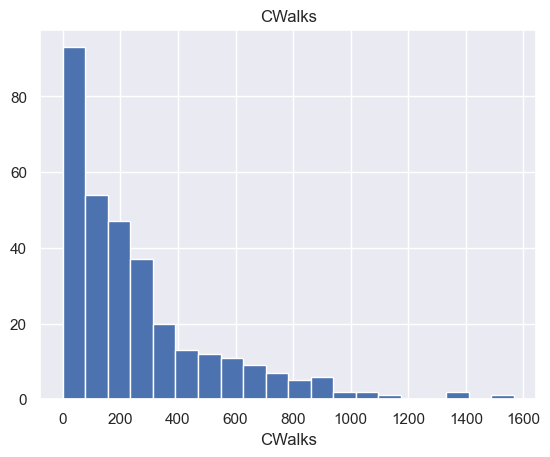

******************** PutOuts ********************

count    322.000

mean     288.938

std      280.705

min        0.000

1%         0.000

5%        33.200

10%       62.200

20%       99.600

30%      132.000

40%      167.000

50%      212.000

60%      257.400

70%      303.000

80%      365.800

90%      685.600

95%      910.650

99%     1301.190

max     1378.000

Name: PutOuts, dtype: float64


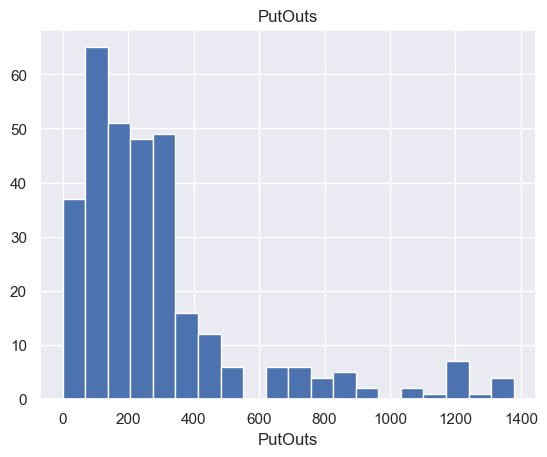

******************** Assists ********************

count   322.000

mean    106.913

std     136.855

min       0.000

1%        0.000

5%        0.000

10%       2.000

20%       5.200

30%       9.000

40%      15.400

50%      39.500

60%      76.800

70%     134.800

80%     210.800

90%     353.300

95%     431.450

99%     478.160

max     492.000

Name: Assists, dtype: float64


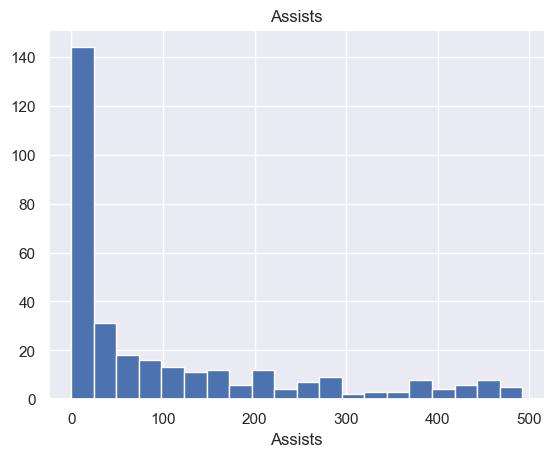

******************** Errors ********************

count   322.000

mean      8.040

std       6.368

min       0.000

1%        0.000

5%        0.000

10%       1.000

20%       3.000

30%       4.000

40%       5.000

50%       6.000

60%       8.000

70%      10.000

80%      13.000

90%      17.000

95%      20.000

99%      25.790

max      32.000

Name: Errors, dtype: float64


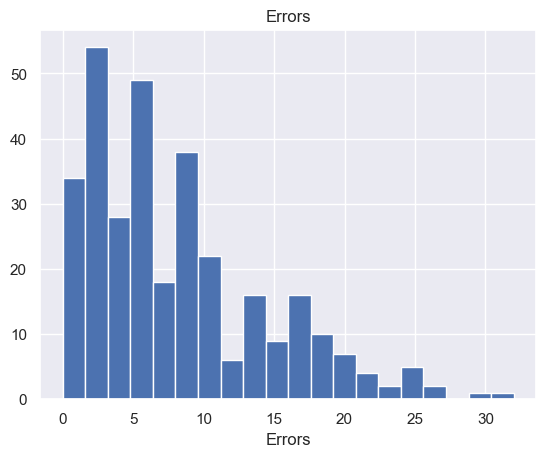

******************** Salary ********************

count    263.000

mean     535.926

std      451.119

min       67.500

1%        70.000

5%        86.600

10%      100.000

20%      155.000

30%      221.000

40%      300.000

50%      425.000

60%      538.000

70%      700.000

80%      809.000

90%     1048.667

95%     1346.000

99%     2032.887

max     2460.000

Name: Salary, dtype: float64


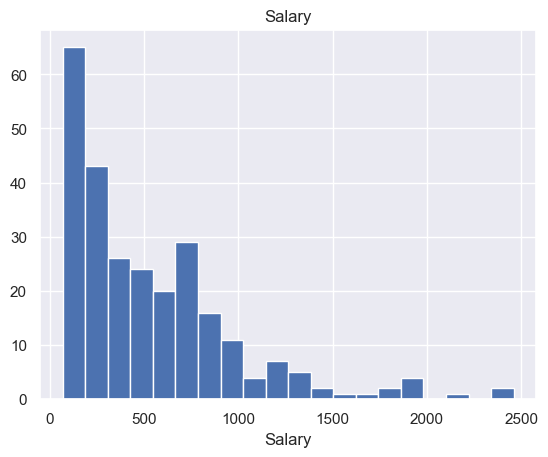

******************** Numerical Target Analysis ********************

******************** Salary ===> AtBat ********************

                 Target Mean

cat_Salary                  

(67.5, 190.0]        349.333

(190.0, 425.0]       350.582

(425.0, 750.0]       425.687

(750.0, 2460.0]      498.565

******************** Salary ===> Hits ********************

                 Target Mean

cat_Salary                  

(67.5, 190.0]         87.939

(190.0, 425.0]        91.716

(425.0, 750.0]       117.134

(750.0, 2460.0]      137.435

******************** Salary ===> HmRun ********************

                 Target Mean

cat_Salary                  

(67.5, 190.0]          8.864

(190.0, 425.0]         9.955

(425.0, 750.0]        11.403

(750.0, 2460.0]       16.758

******************** Salary ===> Runs ********************

                 Target Mean

cat_Salary                  

(67.5, 190.0]         43.697

(190.0, 425.0]        48.313

(425.0, 750.0]        57.358


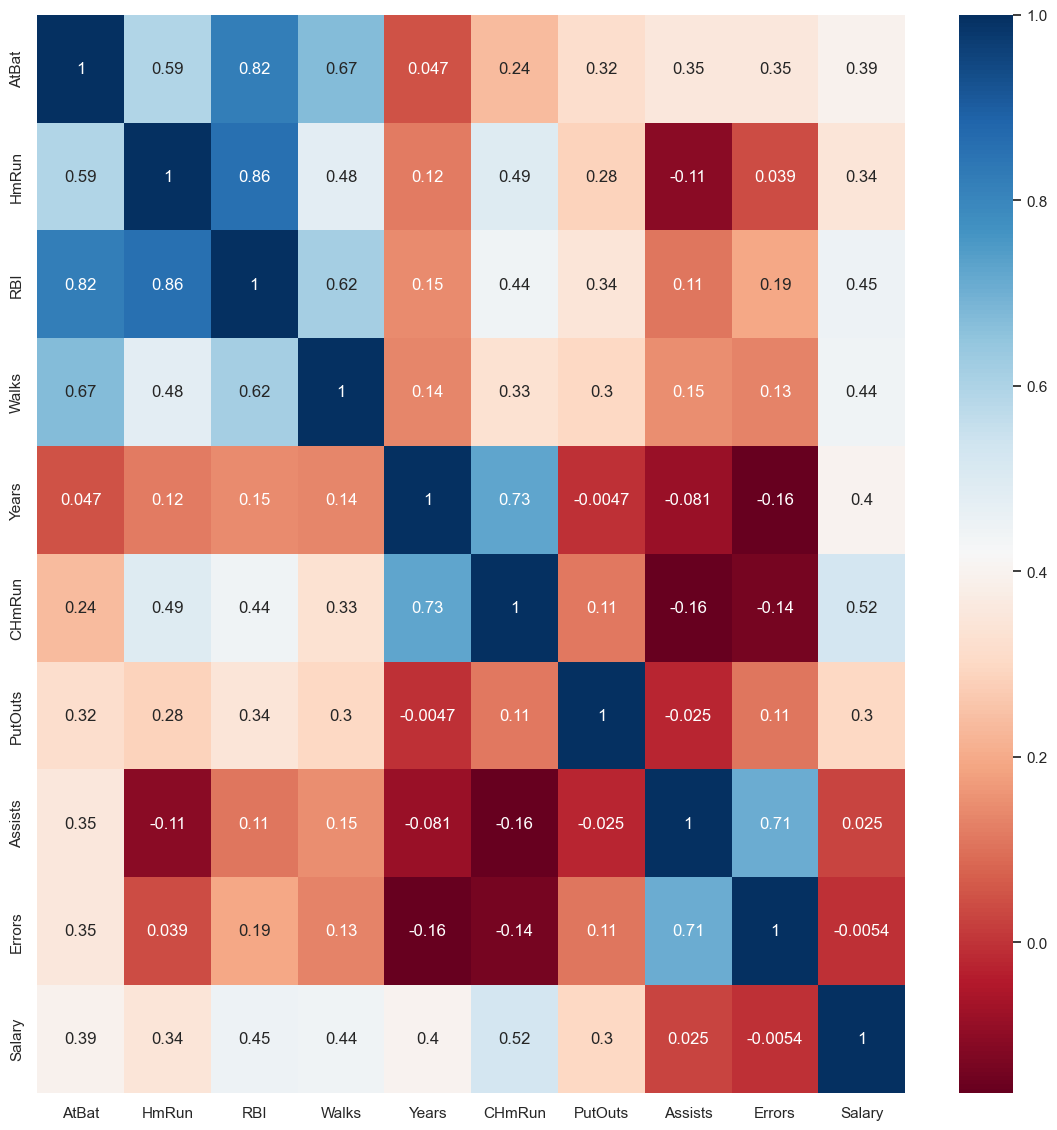

C:\Users\User\AppData\Local\Temp\ipykernel_1444\73733681.py:23: UserWarning: The figure layout has changed to tight

  plt.tight_layout()


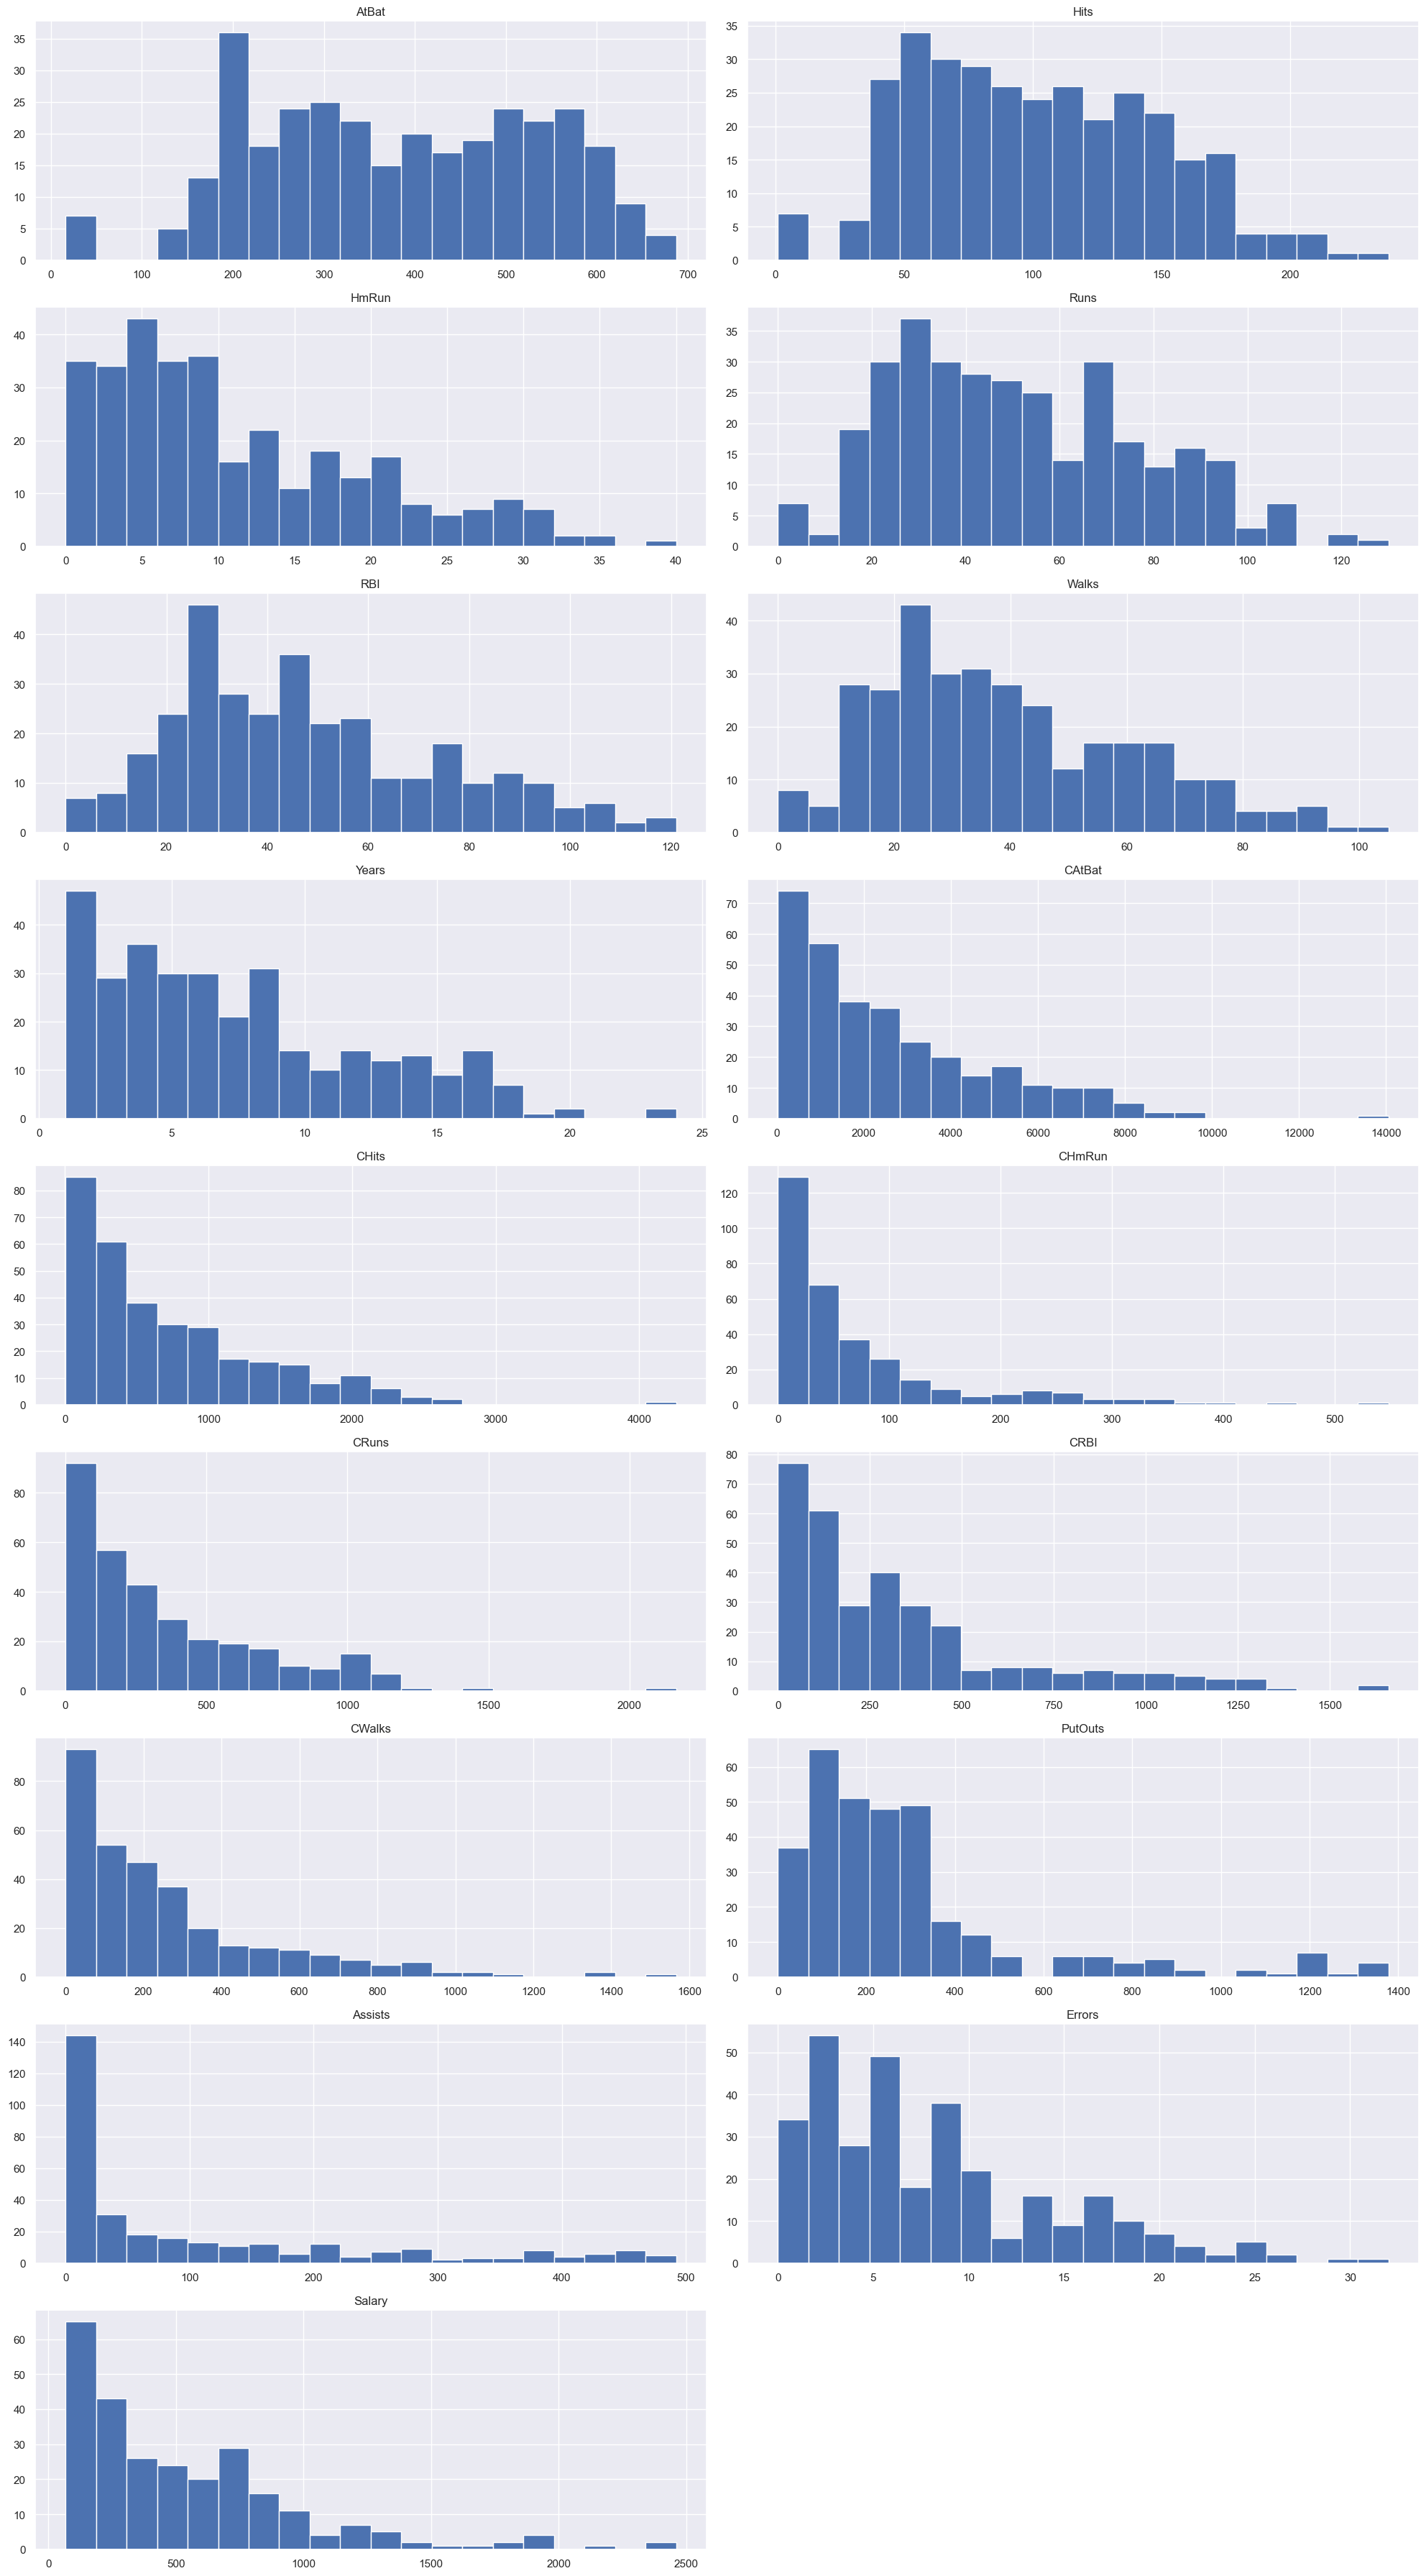

In [20]:
if __name__ == "__main__":
    main(path_dataset="/kaggle/input/hitters/Hitters.csv", target="Salary")